In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/Users/simjoo/Projects/STRT_wound/scripts/'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from WND_misc_scripts_v2_0 import *
from WND_neg_binom_regression_v2_0 import *
from WND_pseudotemporal_ordering_v2_0 import *
from WND_outlier_cell_detection_v2_0 import *

# Initialize engines

In [5]:
from ipyparallel import Client

In [6]:
c = Client(profile='default')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipyparallel/client/client.py:442: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@192.168.1.193')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [7]:
dview = c[:]

In [8]:
dview.execute('import sys')
dview.execute('sys.path.append("/Users/simjoo/Projects/STRT_wound/scripts/")')
dview.execute('from WND_misc_scripts_v2_0 import *')
dview.execute('from WND_neg_binom_regression_v2_0 import *')
dview.execute('from WND_pseudotemporal_ordering_v2_0 import *')
dview.execute('from WND_outlier_cell_detection_v2_0 import *')

<AsyncResult: execute>

# Import Data

In [9]:
exp_id = '201603171136_v2.6'
path_input = '/Users/simjoo/Projects/STRT_wound/data_input/v2.6'
path_output = '/Users/simjoo/Projects/STRT_wound/data_output/v2.6'
path_figures = '/Users/simjoo/Projects/STRT_wound/figures/v2.6'

In [10]:
seq = loadData_v1(path_input, exp_id, 'seq_WND', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta_WND', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [11]:
seq_sel_norm = loadData_v1(path_output, exp_id, 'seq_sel_norm', 'DataFrame')
seq_sel_Lgr5_norm = loadData_v1(path_output, exp_id, 'seq_sel_Lgr5_norm', 'DataFrame')
seq_sel_Lgr6_norm = loadData_v1(path_output, exp_id, 'seq_sel_Lgr6_norm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [12]:
cells_Lgr5_wnd = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd', 'Series')
cells_Lgr5_wnd_ctrl = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd_ctrl', 'Series')
cells_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd_ctrl_sel', 'Series')

cells_Lgr6_wnd = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd', 'Series')
cells_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd_ctrl', 'Series')
cells_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd_ctrl_sel', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [13]:
cl_Lgr5_wnd = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd', 'Series').astype(str)
cl_Lgr5_wnd = AP_groups_reorder_v2(cl_Lgr5_wnd, ['3','2','0','1','4'])

cl_Lgr5_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd_ctrl', 'Series')
cl_Lgr5_wnd_ctrl = AP_groups_reorder_v2(cl_Lgr5_wnd_ctrl, ['ctrl','3','2','0','1','4'])

cl_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd_ctrl_sel', 'Series')
cl_Lgr5_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr5_wnd_ctrl_sel, ['ctrl','3','2','0','1','4'])

cl_Lgr6_wnd = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd', 'Series').astype(str)
cl_Lgr6_wnd = AP_groups_reorder_v2(cl_Lgr6_wnd[cl_Lgr6_wnd!='3'], ['5','1','4','2','0'])

cl_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl', 'Series')
cl_Lgr6_wnd_ctrl = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl!='3'], ['ctrl - IFE','ctrl - IST','5','1','4','2','0'])

cl_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl_sel', 'Series')
cl_Lgr6_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel!='3'], ['ctrl - IFE','ctrl - IST','5','1','4','2','0'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [14]:
tsne_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr5_wnd_ctrl_sel', 'DataFrame')

tsne_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr6_wnd_ctrl_sel', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [15]:
seq_Lgr5_IFE_OB_norm = loadData_v1(path_output, exp_id, 'seq_wnd_IFE_OB_norm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [16]:
cl_Lgr5_wnd_ctrl_sel_OB_IFE = loadData_v1(path_output, exp_id, 'cl_wnd_OB_IFE', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [17]:
tsne_Lgr5_IFE_OB = loadData_v1(path_output, exp_id, 'tsne_wnd_IFE_OB', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [18]:
PTO_coords_Lgr5_OB_IFE = loadData_v1(path_output, exp_id, 'PTO_coords_Lgr5_OB_IFE', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [19]:
PTO_Lgr5_OB_IFE_fitted = loadData_v1(path_output, exp_id, 'PTO_Lgr5_OB_IFE_fitted', 'DataFrame')
PTO_Lgr5_OB_IFE_stats = loadData_v1(path_output, exp_id, 'PTO_Lgr5_OB_IFE_stats', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [20]:
PT_bins = loadData_v1(path_output, exp_id, 'PT_bins_2', 'Series').astype(str)

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [21]:
NBR_PT_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_PT_traces2')

In [22]:
NBR_1st_traces = loadData_from_pickle_v1(path_input, '201509151726', 'NBR_1st_traces')

In [23]:
cmap_Lgr5_time = loadData_v1(path_output, exp_id, 'cmap_Lgr5_time', 'Series')
cmap_Lgr6_time = loadData_v1(path_output, exp_id, 'cmap_Lgr6_time', 'Series')
cmap_Lgr5_state = loadData_v1(path_output, exp_id, 'cmap_Lgr5_state', 'Series')
cmap_Lgr6_state = loadData_v1(path_output, exp_id, 'cmap_Lgr6_state', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [114]:
cmap_bins = {'ctrl':'#2c7bb6',
             '2.0':'#abd9e9',
             '3.0':'#ffffbf',
             '4.0':'#a6d96a',
             '5.0':'#1a9641',
             'Lgr6 - IFE':'#ff7f00','Lgr6 - ctrl - IFE':'#ff7f00',
             'Lgr6 - WF':'#ff7f00','Lgr6 - 5':'#ff7f00','Lgr6 - 1':'#ff7f00'}

# tSNE - Lgr5 vs. telogen IF & OB

In [25]:
c_sel = cl_Lgr5_wnd_ctrl_sel.index

In [26]:
#calculate dist mat with TSNE data

dist_mat_tsne = pairwise_distance_2d(tsne_Lgr5_IFE_OB.ix[c_sel])

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
#generate MST and diameter path based on correlation-defined edge weight

MST, MST_pos = PTO_create_MST_2d(dist_mat_tsne)
diam_edges = PTO_diameter_path(MST, return_edges = True)

Diameter path between 1772117065-F01 and 1772117073-C03 with lenght 60


In [28]:
#bring TSNE positions in networkx compatible format

MST_pos_tsne = {}

for ix in tsne_Lgr5_IFE_OB.index:
    MST_pos_tsne[ix] = (tsne_Lgr5_IFE_OB.ix[ix,'x'], tsne_Lgr5_IFE_OB.ix[ix,'y'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


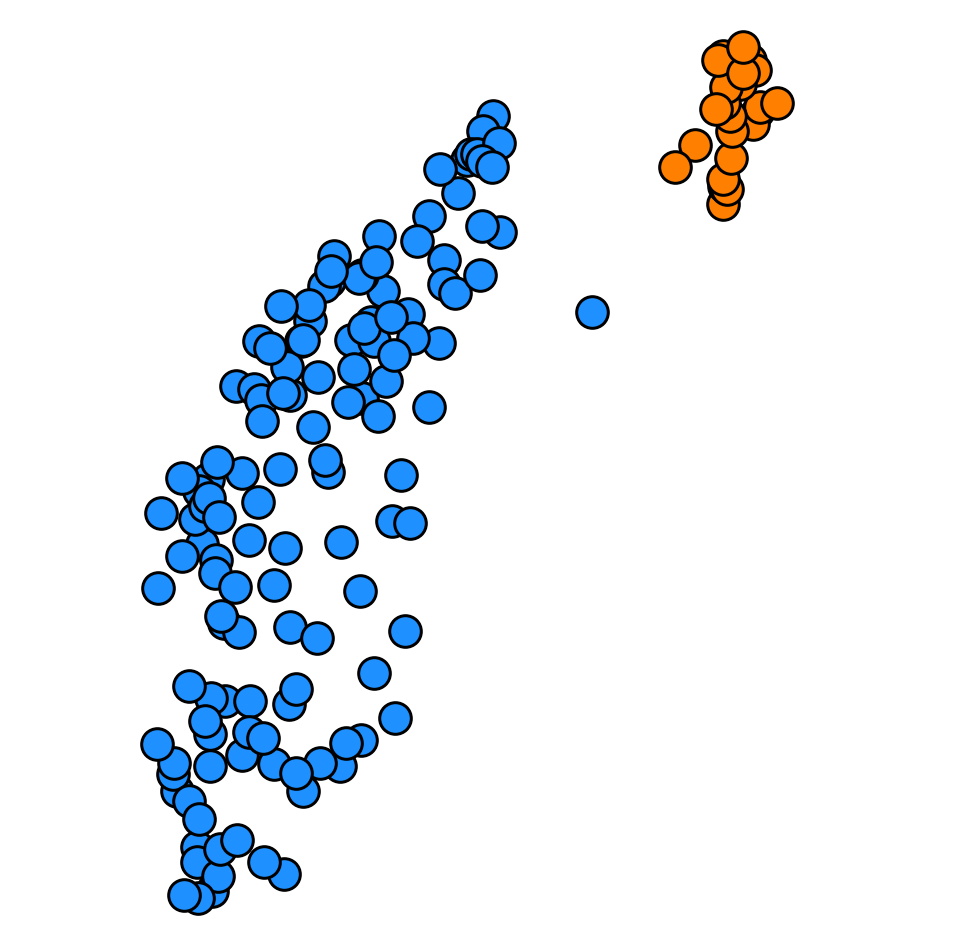

In [30]:
tsne = tsne_Lgr5_IFE_OB
cells = cl_Lgr5_wnd_ctrl_sel_OB_IFE.ix[tsne_Lgr5_IFE_OB.index]
cmap = {}
for gr in return_unique(cl_Lgr5_wnd_ctrl_sel_OB_IFE):
    if gr.split(' - ')[0] == 'Lgr5': cmap[gr] = 'dodgerblue'
    elif gr.split(' - ')[0] == 'Lgr6': cmap[gr] = '#ff7f00'   

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

clist_tsne = [cmap[cells[ix]] for ix in MST.nodes()]

for ix in cells[~cells.isin(['IFEB','OB'])].index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_2_Lgr5_tSNE_OB_IFE.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

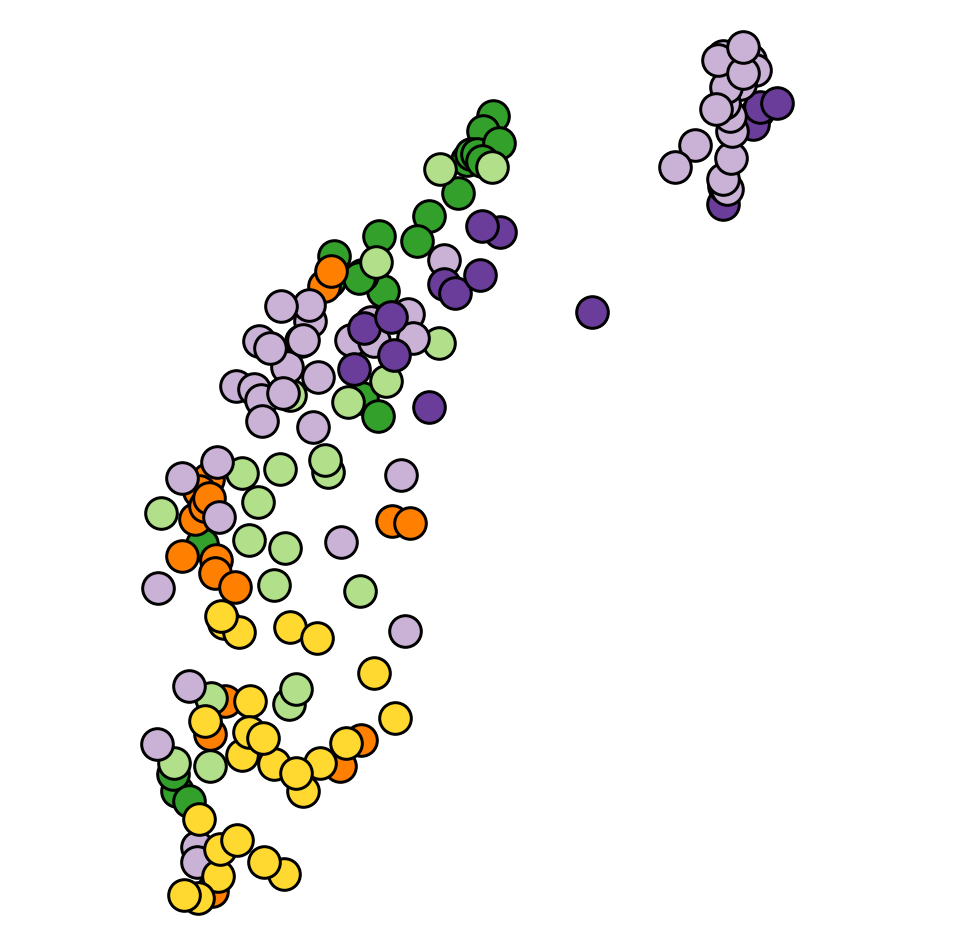

In [31]:
tsne = tsne_Lgr5_IFE_OB
cells = cl_Lgr5_wnd_ctrl_sel_OB_IFE.ix[tsne_Lgr5_IFE_OB.index]
cmap = pd.concat([cmap_Lgr5_state, cmap_Lgr6_state])

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

clist_tsne = [cmap[cells[ix]] for ix in MST.nodes()]

for ix in cells[~cells.isin(['IFEB','OB'])].index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_2_Lgr5_tSNE_OB_IFE_states.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

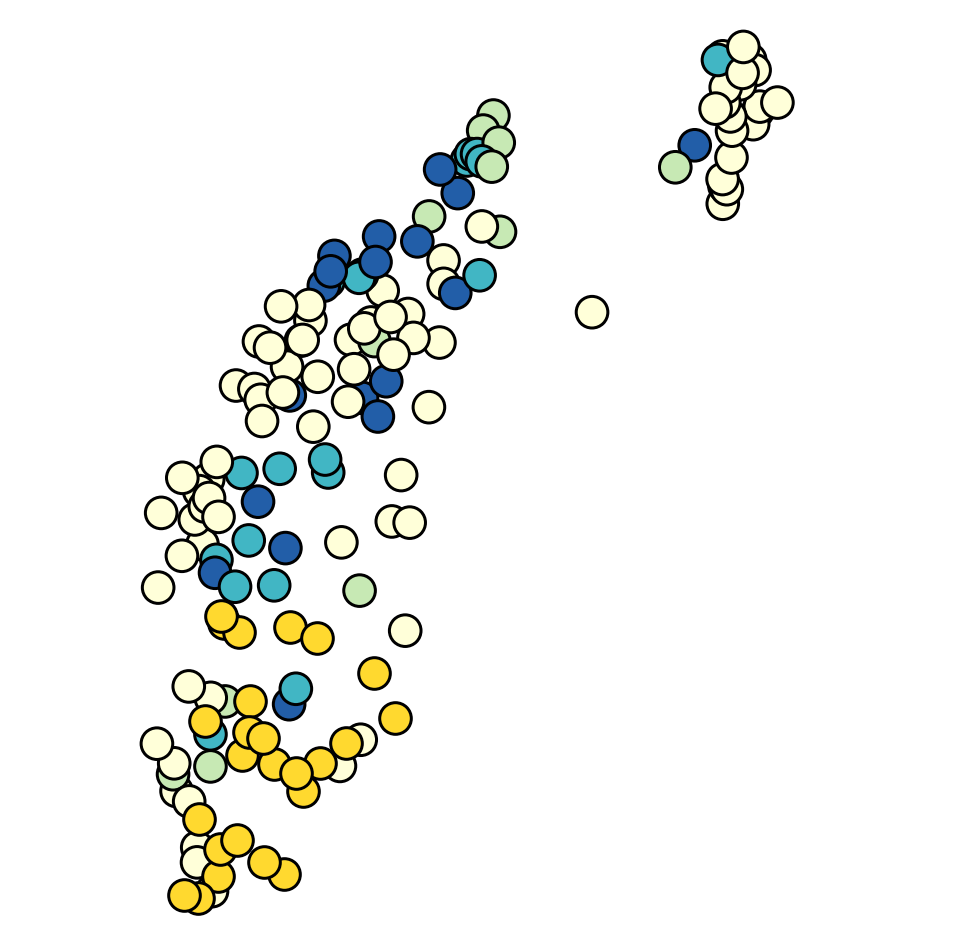

In [44]:
tsne = tsne_Lgr5_IFE_OB
cells = pd.concat([cells_Lgr5_wnd_ctrl_sel, cells_Lgr6_wnd_ctrl_sel])
cmap = pd.concat([cmap_Lgr5_time, cmap_Lgr6_time])

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

clist_tsne = [cmap[cells[ix]] for ix in MST.nodes()]

for ix in tsne_Lgr5_IFE_OB.index:
    
    try:

        ax1.scatter(tsne.ix[ix,'x'],
                    tsne.ix[ix,'y'], 
                    s = 1000,
                    linewidth = 3.0,
                    c = cmap[cells[ix]],
                    edgecolor='black', 
                    marker = 'o')
        
    except:
        continue

clean_axis(ax1)

figname = 'v2.6_2_Lgr5_tSNE_OB_IFE_time.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [ ]:
tsne = tsne_Lgr5_IFE_OB
cells = cl_Lgr5_wnd_ctrl_sel_OB_IFE.ix[tsne_Lgr5_IFE_OB.index]
cmap = pd.concat([cmap_Lgr5_, cmap_Lgr6_state])

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

clist_tsne = [cmap[cells[ix]] for ix in MST.nodes()]

for ix in cells[~cells.isin(['IFEB','OB'])].index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_2_Lgr5_tSNE_OB_IFE_states.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

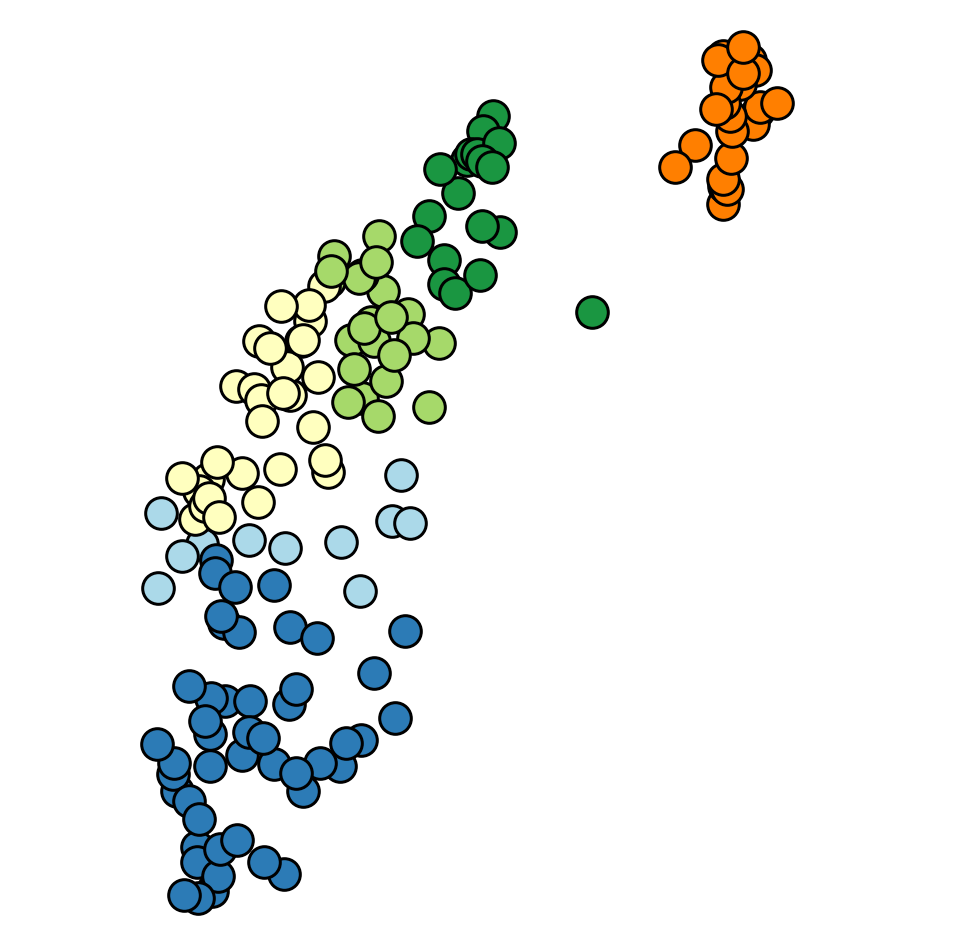

In [32]:
tsne = tsne_Lgr5_IFE_OB
cells = pd.concat([PT_bins, cl_Lgr5_wnd_ctrl_sel_OB_IFE[cl_Lgr5_wnd_ctrl_sel_OB_IFE.isin(['Lgr6 - 1','Lgr6 - 5'])]])
cmap = cmap_bins

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

clist_tsne = [cmap[cells[ix]] for ix in MST.nodes()]

for ix in cells[~cells.isin(['IFEB','OB'])].index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_2_Lgr5_tSNE_OB_IFE_bins.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Time points along pseudotime

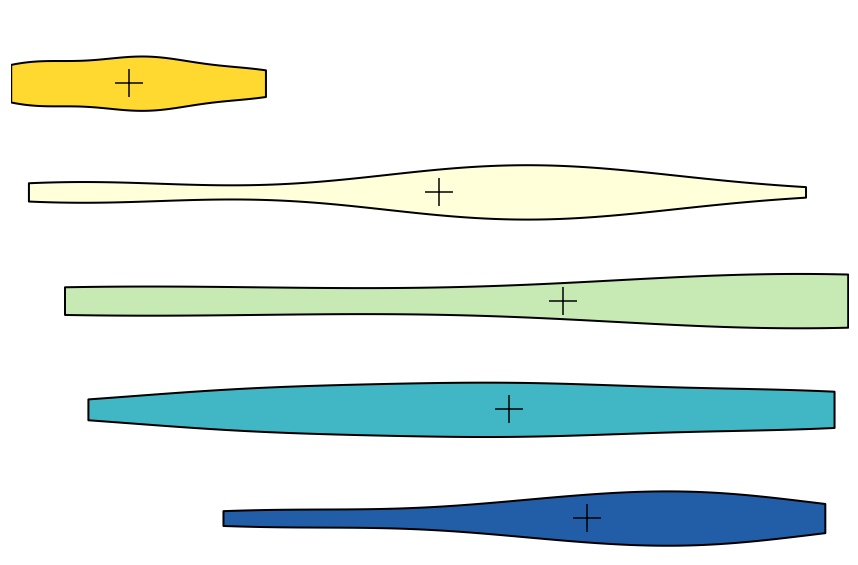

In [48]:
PTO_coords = PTO_coords_Lgr5_OB_IFE[c_sel]
cells = cells_Lgr5_wnd_ctrl_sel[c_sel]
cmap = cmap_Lgr5_time

ax_scale = 1.0

#initialize figure

height = 2 * len(return_unique(cells))
width = 15
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs1 = plt.GridSpec(len(return_unique(cells)), 1, hspace=0.0, wspace = 0.1)

#plot KDEs

for pos,gr in enumerate(['0 d','1 d','4 d','7 d','10 d']):

    ax = plt.subplot(gs1[pos,0])
    ax.set_xlim(0, PTO_coords.max())
    ax.set_ylim(0,1.5)
    
    ix_tmp = cells[cells==gr].index
    pos_tmp = PTO_coords[ix_tmp]
    
    violin = ax.violinplot(pos_tmp,
                       positions = [0.5],
                       vert=False,
                       showextrema=False, 
                       widths=0.75)
    
    for v in violin['bodies']:
        v.set_facecolor(cmap[gr])
        v.set_edgecolor('k')
        v.set_linewidth(2.0)
        v.set_alpha(1.0)
        
    ax.scatter(np.mean(pos_tmp), 0.5, color = 'black', marker = '+', s = 750)
    
    clean_axis(ax)

figname = 'v2.6_2_Lgr5_KDE_time.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# States along pseudotime

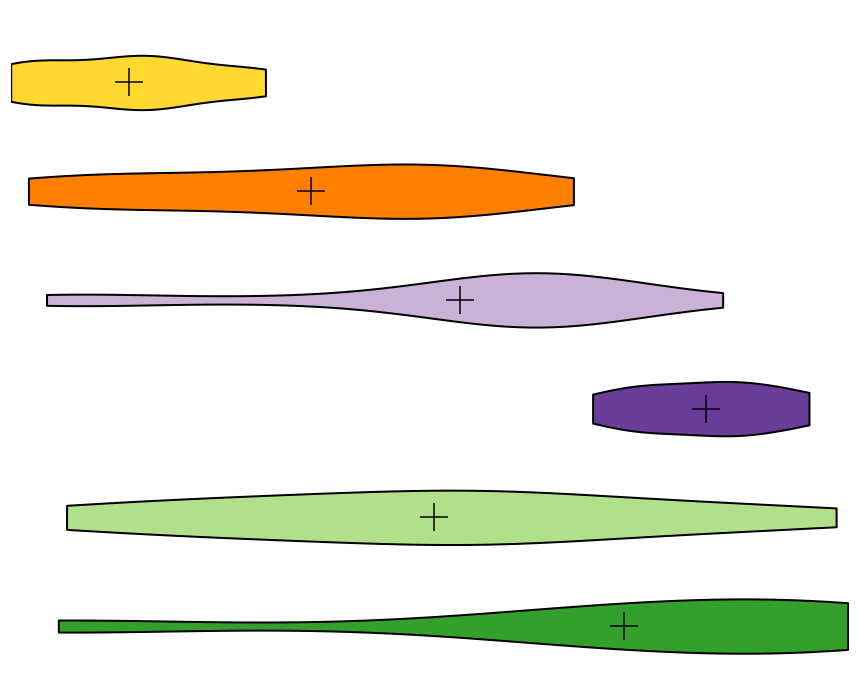

In [49]:
PTO_coords = PTO_coords_Lgr5_OB_IFE[c_sel]
cells = cl_Lgr5_wnd_ctrl_sel[c_sel]
cmap = cmap_Lgr5_state

ax_scale = 1.0

#initialize figure

height = 2 * len(return_unique(cells))
width = 15
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs1 = plt.GridSpec(len(return_unique(cells)), 1, hspace=0.0, wspace = 0.1)

#plot KDEs

for pos,gr in enumerate(return_unique(cl_Lgr5_wnd_ctrl_sel)):

    ax = plt.subplot(gs1[pos,0])
    ax.set_xlim(0, PTO_coords.max())
    ax.set_ylim(0,1.5)
    
    ix_tmp = cells[cells==gr].index
    pos_tmp = PTO_coords[ix_tmp]
    
    violin = ax.violinplot(pos_tmp,
                       positions = [0.5],
                       vert=False,
                       showextrema=False, 
                       widths=0.75)
    
    for v in violin['bodies']:
        v.set_facecolor(cmap[gr])
        v.set_edgecolor('k')
        v.set_linewidth(2.0)
        v.set_alpha(1.0)
        
    ax.scatter(np.mean(pos_tmp), 0.5, color = 'black', marker = '+', s = 750)
    
    clean_axis(ax)

figname = 'v2.6_2_Lgr5_KDE_states.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Sampling time point stratified according bins

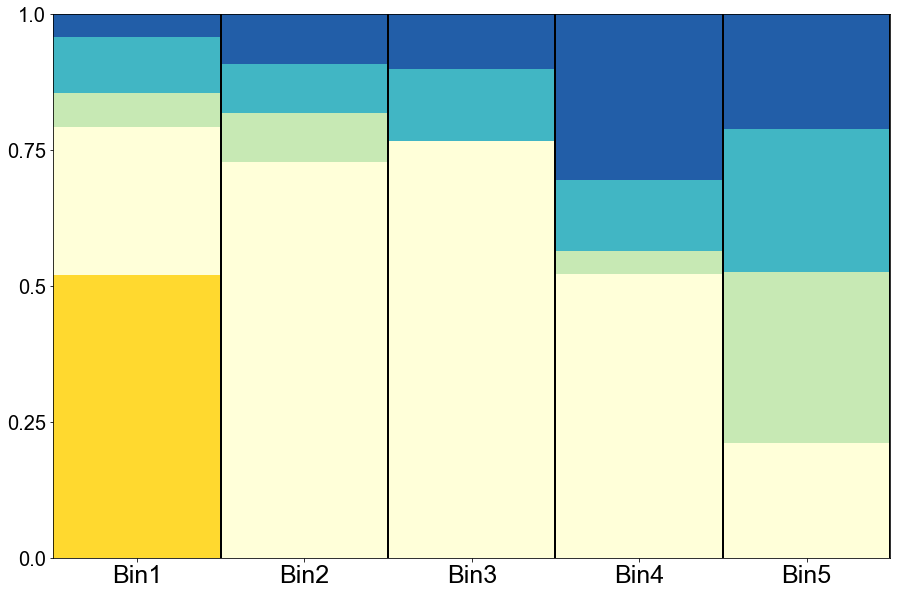

In [263]:
bins = PT_bins
bin_order = ['ctrl', '2.0', '3.0', '4.0', '5.0']

time = cells_Lgr5_wnd_ctrl
time_order = ['0 d','1 d','4 d','7 d','10 d']

cmap = cmap_Lgr5_time

#initialize figure

height = 10
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

# plot data

ax.set_xlim(-0.5, len(set(PT_bins)) - 0.5)
ax.set_ylim(0,1)

ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels([0.0, 0.25, 0.5, 0.75, 1.0], family = 'Arial', fontsize = 20)

ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['Bin1','Bin2','Bin3','Bin4','Bin5'], family = 'Arial', fontsize = 25)


for pos, b in enumerate(bin_order):
    c_sel = bins[bins==b].index
    l_tmp = len(c_sel)
    counter_tmp = Counter(time[c_sel])
    bottom = 0
    
    for t in time_order:
        incr = counter_tmp[t] / l_tmp
        ax.bar(pos, height = incr  + bottom, bottom = bottom, width = 1, color = cmap[t])
        bottom += incr
        
    ax.axvline(pos + 0.5, linewidth = 2, color = 'k')
    
figname = 'v2.6_S4_Bins_Time.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)  

# Cell state stratified according bins

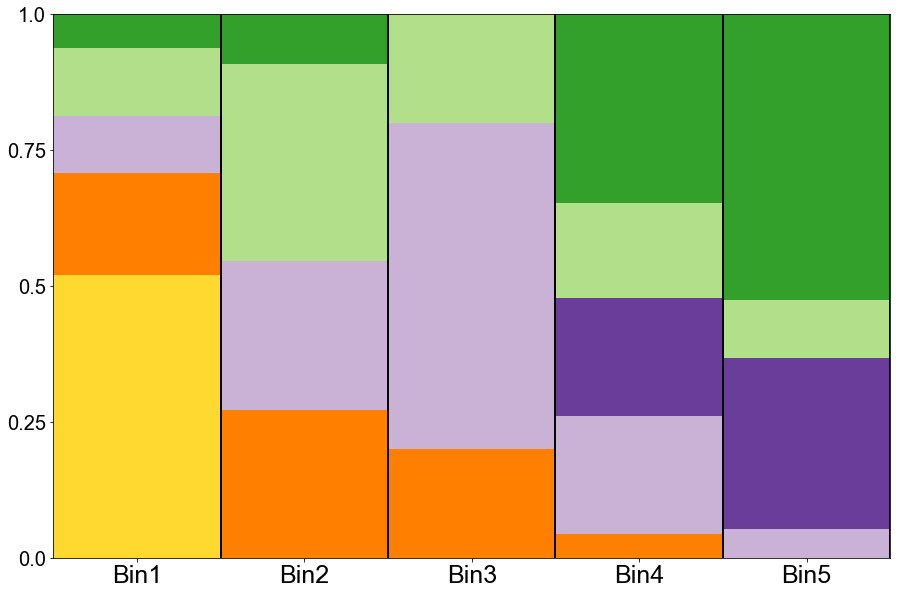

In [264]:
bins = PT_bins
bin_order = ['ctrl', '2.0', '3.0', '4.0', '5.0']

states = cl_Lgr5_wnd_ctrl
states_order = return_unique(cl_Lgr5_wnd_ctrl)

cmap = cmap_Lgr5_state

#initialize figure

height = 10
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

# plot data

ax.set_xlim(-0.5, len(set(PT_bins)) - 0.5)
ax.set_ylim(0,1)

ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels([0.0, 0.25, 0.5, 0.75, 1.0], family = 'Arial', fontsize = 20)

ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['Bin1','Bin2','Bin3','Bin4','Bin5'], family = 'Arial', fontsize = 25)


for pos, b in enumerate(bin_order):
    c_sel = bins[bins==b].index
    l_tmp = len(c_sel)
    counter_tmp = Counter(states[c_sel])
    bottom = 0
    
    for t in states_order:
        incr = counter_tmp[t] / l_tmp
        ax.bar(pos, height = incr  + bottom, bottom = bottom, width = 1, color = cmap[t])
        bottom += incr
        
    ax.axvline(pos + 0.5, linewidth = 2, color = 'k')
    
figname = 'v2.6_S4_Bins_state.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Combined expression of genes up- and downregulated in IFE cells compared to OB

In [54]:
NBR_1st_telogen_IFEB_vs_OB = neg_binom_estimate_prob_all_groups_v1P(NBR_1st_traces[['7','2']], dview)

In [55]:
genes_sel_OB = NBR_1st_telogen_IFEB_vs_OB['7'][NBR_1st_telogen_IFEB_vs_OB['7']==0].index
genes_sel_IFEB = NBR_1st_telogen_IFEB_vs_OB['2'][NBR_1st_telogen_IFEB_vs_OB['2']==0].index

In [56]:
len(genes_sel_OB), len(genes_sel_IFEB)

(322, 295)

In [53]:
PTO_Lgr5_OB_IFE_fitted_norm = PTO_Lgr5_OB_IFE_fitted.apply(lambda x: x / np.max(x), axis = 1)

ix_sel = [g for g in PTO_Lgr5_OB_IFE_fitted_norm.index if np.isnan(PTO_Lgr5_OB_IFE_fitted_norm).sum(axis=1).ix[g] == 0]
PTO_Lgr5_OB_IFE_fitted_norm = PTO_Lgr5_OB_IFE_fitted_norm.ix[ix_sel]

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


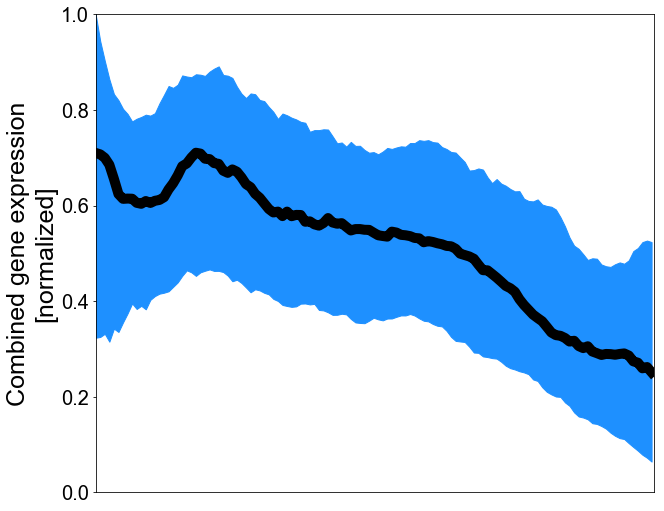

In [54]:
dataset = PTO_Lgr5_OB_IFE_fitted_norm
genes = [g for g in genes_sel_OB if g in dataset.index]
dataset = dataset.ix[genes]
PTO_coords = PTO_coords_Lgr5_OB_IFE

y_max_genes = 1
size_ylab = 25
size_ticklabs = 20
size_leglab = 25

#initialize figure

height = 10
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6, 0.5])

#define xlim

xlim = (np.min(PTO_coords.values), np.max(PTO_coords.values))

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(xlim)
ax1.set_xticks([])

ax1.set_ylim(0, y_max_genes)
for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(size_ticklabs)
ax1.set_ylabel('Combined gene expression\n[normalized]', family = 'Arial', fontsize = size_ylab)


ax1.plot(np.arange(0, np.max(PTO_coords)),
        dataset.median(),
        color = 'black',
        linewidth = 10)

ax1.fill_between(np.arange(0, np.max(PTO_coords)), 
                dataset.quantile(q = 0.25, axis = 0), 
                dataset.quantile(q = 0.75, axis = 0), 
                color = 'dodgerblue', alpha = 1)

figname = 'v2.6_2_Lgr5_OB_genes_comb.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

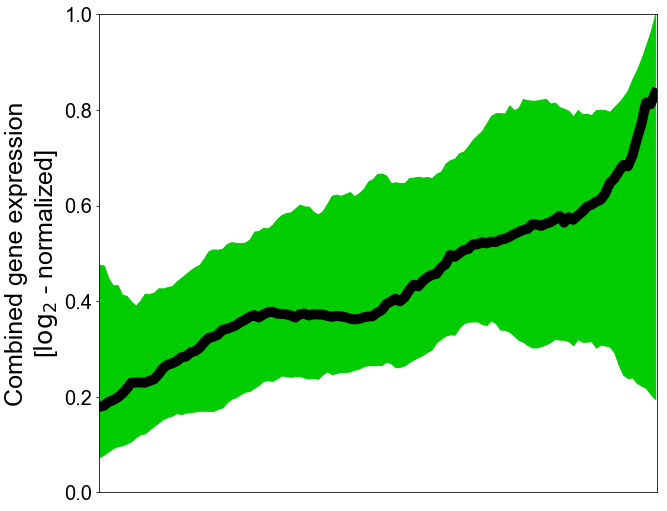

In [55]:
dataset = PTO_Lgr5_OB_IFE_fitted_norm
genes = [g for g in genes_sel_IFEB if g in dataset.index]
dataset = dataset.ix[genes]
PTO_coords = PTO_coords_Lgr5_OB_IFE

y_max_genes = 1
size_ylab = 25
size_ticklabs = 20
size_leglab = 25

#initialize figure

height = 10
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6, 0.5])

#define xlim

xlim = (np.min(PTO_coords.values), np.max(PTO_coords.values))

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(xlim)
ax1.set_xticks([])

ax1.set_ylim(0, y_max_genes)
for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(size_ticklabs)
ax1.set_ylabel('Combined gene expression\n[$\log_2$ - normalized]', family = 'Arial', fontsize = size_ylab)

ax1.plot(np.arange(0, np.max(PTO_coords)),
        dataset.median(),
        color = 'black',
        linewidth = 10)

ax1.fill_between(np.arange(0, np.max(PTO_coords)), 
                dataset.quantile(q = 0.25, axis = 0), 
                dataset.quantile(q = 0.75, axis = 0), 
                color = '#00CC00', alpha = 1)

figname = 'v2.6_2_Lgr5_IFE_genes_comb.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Expression of example genes (violins)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


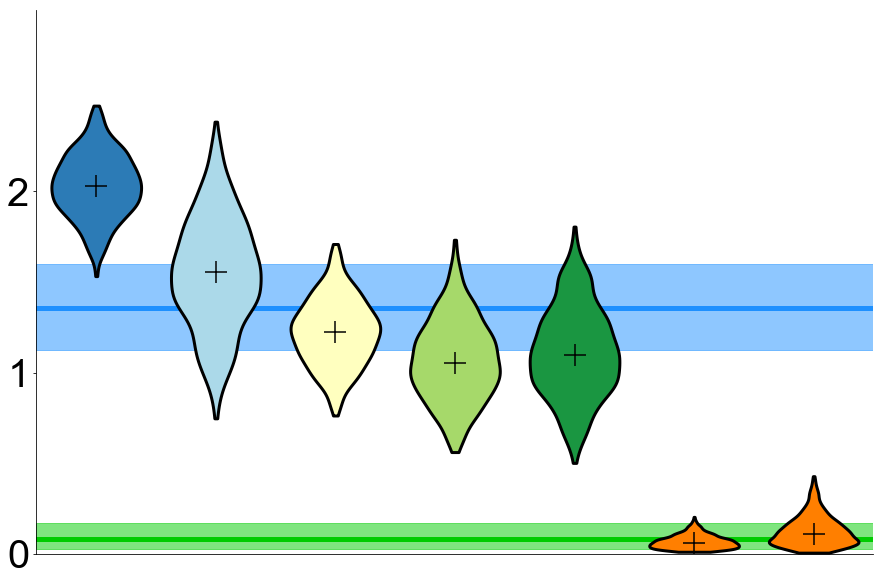

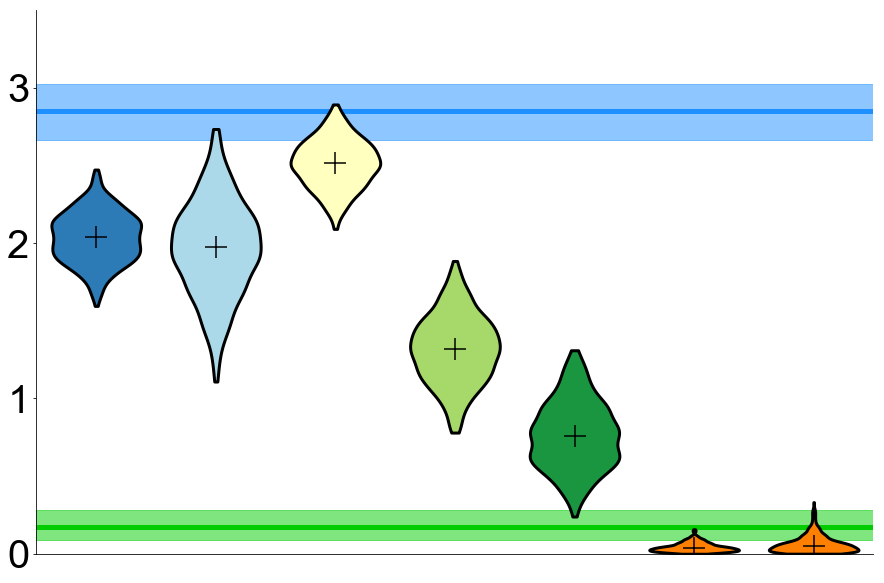

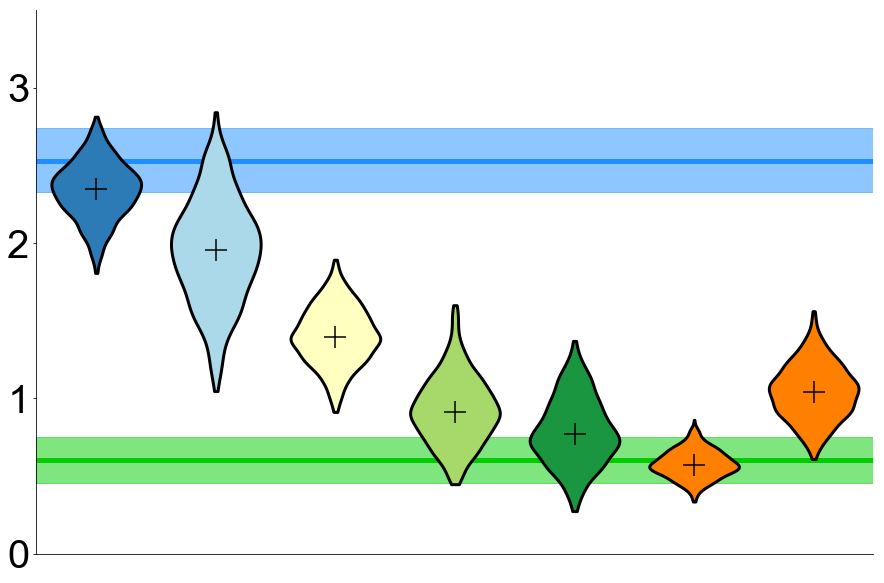

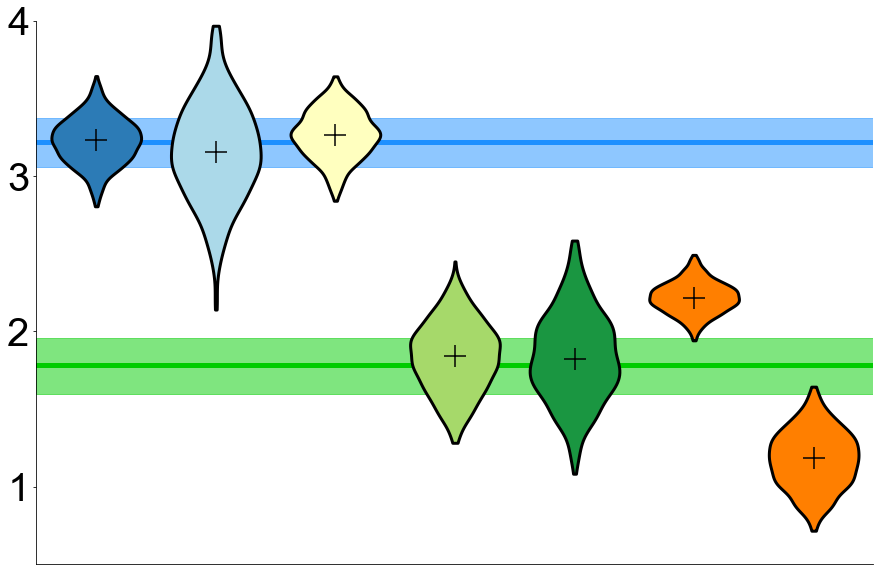

In [46]:
#define input variables

genes = ['Lgr5','Cd34','Sparc','Cxcl14']
vmin = [0,0,0,0.5]
vmax = [3,3.5,3.5,4]
groups = ['ctrl',u'2.0',u'3.0',u'4.0',u'5.0','Lgr6 - IFE','Lgr6 - WF']
cmap = cmap_bins
    
for x, gene in enumerate(genes):
    
    traces = NBR_PT_traces.ix[gene]

    #initialize figure

    height = 10
    width = 15
    plt.figure(facecolor = 'w', figsize = (width, height))
    gs = plt.GridSpec(1, 1, hspace = 0.15, wspace = 0.0)

    #create violin plot axis
    
    y_min = np.min([np.log2(np.min(t)) for t in traces])
    y_max = np.max([np.log2(np.max(t)) for t in traces])

    ax1 = plt.subplot(gs[0,0])
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.set_xlim(-0.5, len(groups) - 0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks(np.arange(np.floor(y_min), np.ceil(y_max),1))

    #ax1.set_ylabel('Gene expression [NBR traces - log2]', family = 'Arial', fontsize = 30)
    
    #plot medians, 5th and 95th percentile of Lgr5 and Lgr6 control cells
    
    ax1.axhline(np.median([np.log2(x) for x in traces.ix['OB']]), color = 'dodgerblue', linewidth = 5, zorder = 0)
    ax1.axhspan(np.percentile([np.log2(x) for x in traces.ix['OB']], 0.5), 
                     np.percentile([np.log2(x) for x in traces.ix['OB']], 99.5), 
                     color = 'dodgerblue', alpha = 0.5, zorder = 0)
    
    ax1.axhline(np.median([np.log2(x) for x in traces.ix['IFEB']]), color = '#00CC00', linewidth = 5, zorder = 0)
    ax1.axhspan(np.percentile([np.log2(x) for x in traces.ix['IFEB']], 0.5), 
                     np.percentile([np.log2(x) for x in traces.ix['IFEB']], 99.5), 
                     color = '#00CC00', alpha = 0.5, zorder = 0)

    #iterate over genes

    for pos, gr in enumerate(groups):

        #print group traces
        
        perc_min, perc_max = np.percentile(traces[gr], 0.5), np.percentile(traces[gr], 99.5)
        violin = ax1.violinplot([np.log2(x) for x in traces[gr] if perc_min < x < perc_max],
                           positions = [pos],
                           vert=True,
                           showextrema=False, 
                           widths=0.75,)

        ax1.scatter(pos, 
                    np.median([np.log2(x) for x in traces.ix[gr]]),
                    color = 'black', marker = '+', s = 500, zorder = 2)

        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[gr])
            v.set_linewidth(3.0)
            v.set_alpha(1.0)

        for ix, t in enumerate(ax1.yaxis.get_ticklabels()):
            if ix % 1 != 0.5:
                t.set_family('Arial')
                t.set_fontsize(40)
            else:
                t.set_fontsize(0)
                
    ax1.set_ylim(vmin[x],vmax[x])
                
    figname = 'v2.6_2_Expression_NBR_%s.pdf' % (gene)
    plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


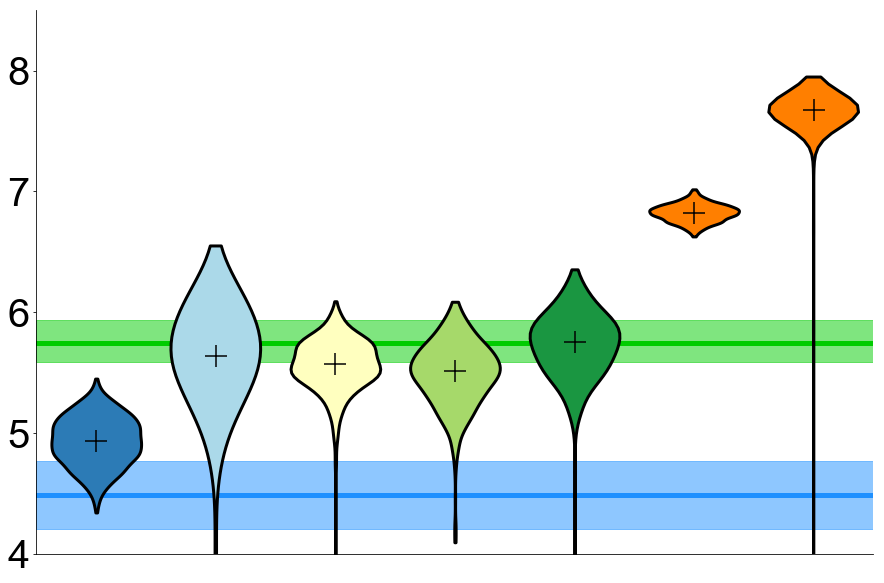

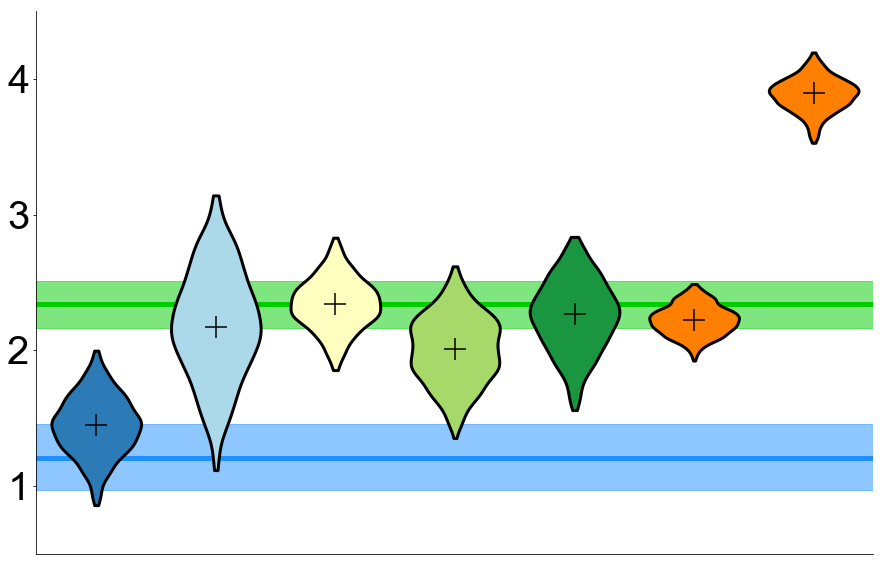

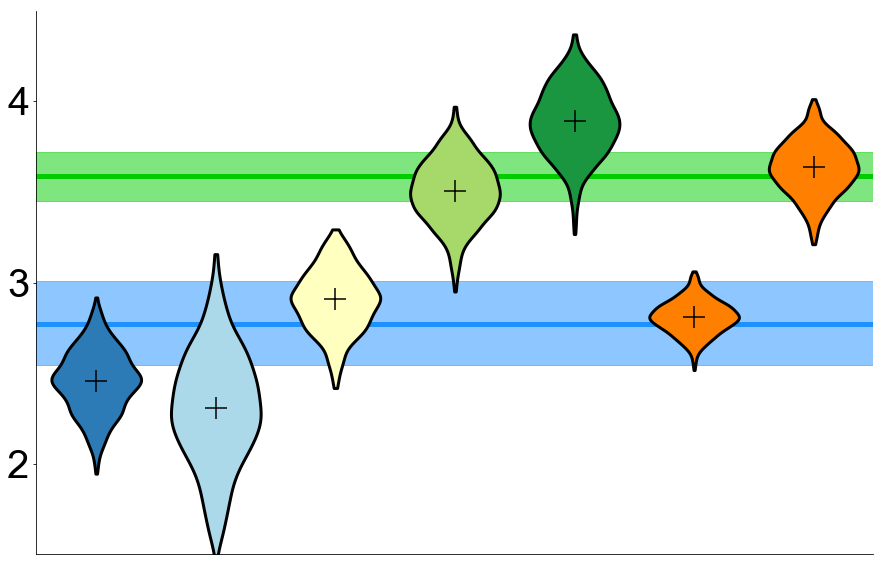

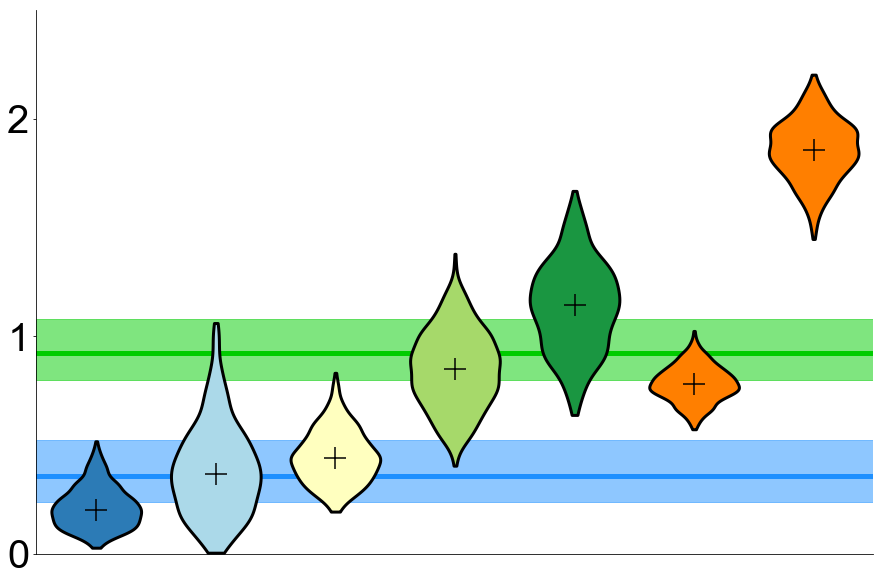

In [48]:
#define input variables

genes = ['Krt14','Ifitm3','Eef1b2','Ly6e']
vmin = [4,0.5,1.5,0]
vmax = [8.5,4.5,4.5,2.5]
groups = ['ctrl',u'2.0',u'3.0',u'4.0',u'5.0','Lgr6 - IFE','Lgr6 - WF']
cmap = cmap_bins
    
for x, gene in enumerate(genes):
    
    traces = NBR_PT_traces.ix[gene]

    #initialize figure

    height = 10
    width = 15
    plt.figure(facecolor = 'w', figsize = (width, height))
    gs = plt.GridSpec(1, 1, hspace = 0.15, wspace = 0.0)

    #create violin plot axis
    
    y_min = np.min([np.log2(np.min(t)) for t in traces])
    y_max = np.max([np.log2(np.max(t)) for t in traces])

    ax1 = plt.subplot(gs[0,0])
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.set_xlim(-0.5, len(groups) - 0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks(np.arange(np.floor(y_min), np.ceil(y_max),1))

    #ax1.set_ylabel('Gene expression [NBR traces - log2]', family = 'Arial', fontsize = 30)
    
    #plot medians, 5th and 95th percentile of telogen OB and IFE cells
    
    ax1.axhline(np.median([np.log2(x) for x in traces.ix['OB']]), color = 'dodgerblue', linewidth = 5, zorder = 0)
    ax1.axhspan(np.percentile([np.log2(x) for x in traces.ix['OB']], 0.5), 
                     np.percentile([np.log2(x) for x in traces.ix['OB']], 99.5), 
                     color = 'dodgerblue', alpha = 0.5, zorder = 0)
    
    ax1.axhline(np.median([np.log2(x) for x in traces.ix['IFEB']]), color = '#00CC00', linewidth = 5, zorder = 0)
    ax1.axhspan(np.percentile([np.log2(x) for x in traces.ix['IFEB']], 0.5), 
                     np.percentile([np.log2(x) for x in traces.ix['IFEB']], 99.5), 
                     color = '#00CC00', alpha = 0.5, zorder = 0)

    #iterate over genes

    for pos, gr in enumerate(groups):

        #print group traces
        
        perc_min, perc_max = np.percentile(traces[gr], 0.5), np.percentile(traces[gr], 99.5)
        violin = ax1.violinplot([np.log2(x) for x in traces[gr] if perc_min < x < perc_max],
                           positions = [pos],
                           vert=True,
                           showextrema=False, 
                           widths=0.75,)

        ax1.scatter(pos, 
                    np.median([np.log2(x) for x in traces.ix[gr]]),
                    color = 'black', marker = '+', s = 500, zorder = 2)

        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[gr])
            v.set_linewidth(3.0)
            v.set_alpha(1.0)

        for ix, t in enumerate(ax1.yaxis.get_ticklabels()):
            if ix % 1 != 0.5:
                t.set_family('Arial')
                t.set_fontsize(40)
            else:
                t.set_fontsize(0)
                
    ax1.set_ylim(vmin[x],vmax[x])
                
    figname = 'v2.6_2_Expression_NBR_%s.pdf' % (gene)
    plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Transcription factors

In [72]:
TF_mm9 = open('%s/TF_mm9.txt' % path_input, 'r').read().split()

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


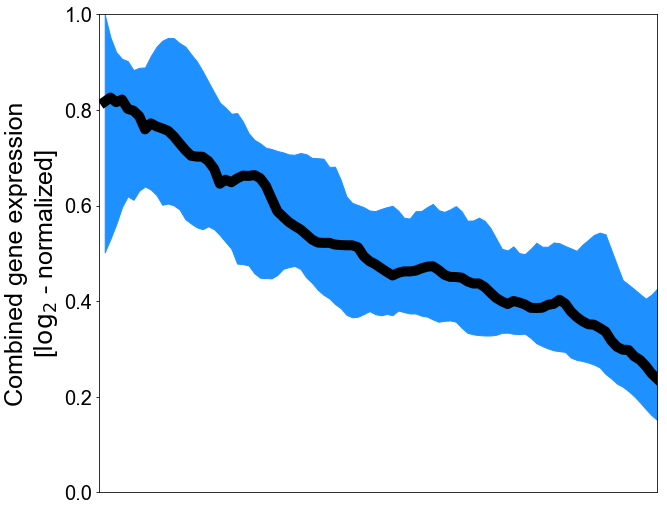

In [73]:
genes = [g for g in genes_sel_OB if g in TF_mm9]
dataset = PTO_Lgr5_OB_IFE_fitted_norm.ix[genes]
dataset = dataset.ix[np.isnan(dataset).sum(axis=1)[np.isnan(dataset).sum(axis=1)==0].index]
PTO_coords = PTO_coords_Lgr5_OB_IFE

y_max_genes = 1
size_ylab = 25
size_ticklabs = 20
size_leglab = 25

#initialize figure

height = 10
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6, 0.5])

#define xlim

xlim = (np.max(PTO_coords.values), np.min(PTO_coords.values))

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(xlim)
ax1.set_xticks([])

ax1.set_ylim(0, y_max_genes)
for t in ax1.get_yticklabels():
    t.set_family('Arial')
    t.set_fontsize(size_ticklabs)
ax1.set_ylabel('Combined gene expression\n[$\log_2$ - normalized]', family = 'Arial', fontsize = size_ylab)


ax1.plot(np.arange(0, np.max(PTO_coords)),
        dataset.median(),
        color = 'black',
        linewidth = 10)

ax1.fill_between(np.arange(0, np.max(PTO_coords)), 
                dataset.quantile(q = 0.25, axis = 0), 
                dataset.quantile(q = 0.75, axis = 0), 
                color = 'dodgerblue', alpha = 1)

figname = 'v2.4_3_Lgr5_OB_genes_comb_TF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# IFE vs. OB classification

In [50]:
def logit_2groups_CV(data, cells, log2_cv_diff, genes_range, groups_model, groups, **kwargs):
    
    from sklearn.linear_model import LogisticRegressionCV
    
    #define output
    
    mod1, mod2 = list(set(groups_model))[0], list(set(groups_model))[1]
    
    multi_ix1 = []
    multi_ix2 = []
    for g in genes_range:
        multi_ix1 += [g] * len(set(groups_model))
        multi_ix2 += [mod1,mod2]
    
    multi_ix = [np.array(multi_ix1),np.array(multi_ix2)]
            
    output = pd.DataFrame(index = multi_ix, columns = groups)
        
    #iterate over genes
    
    for g in genes_range:
        
        genes = log2_cv_diff.order()[-g:].index
        
        #train model
                        
        logreg = LogisticRegressionCV(**kwargs)
        logreg.fit(data.ix[genes, groups_model.index].T, groups_model)
        
        #iterate over groups
        
        for gr in groups:
            
            cells_tmp = cells[cells==gr]
            
            data_tmp = data.ix[genes, cells_tmp.index]
            
            #predict
                    
            cells_predict = pd.Series(logreg.predict(data_tmp.T), index = data_tmp.T.index)
                                                
            #score accuracy
            
            counter_tmp = Counter(cells_predict)
                                                
            output.ix[g, mod1][gr] = counter_tmp[mod1]
            output.ix[g, mod2][gr] = counter_tmp[mod2]
                        
    return output

In [51]:
def logit_2groups_get_proba_v2(data, cells, genes, groups_model, groups, **kwargs):
    
    from sklearn.linear_model import LogisticRegressionCV
    
    #define output
                
    output = pd.DataFrame(index = cells.index, columns = ['class','proba','log_proba'])
        
    #train model
                        
    logreg = LogisticRegressionCV(**kwargs)
    logreg.fit(data.ix[genes, groups_model.index].T, groups_model)
            
    #predict
                    
    output['class'] = logreg.predict(data.ix[genes, cells.index].T)
    output['proba'] = logreg.predict_proba(data.ix[genes, cells.index].T)
    output['log_proba'] = logreg.predict_log_proba(data.ix[genes, cells.index].T)
                        
    return output

### Select features (genes significantly upregulated in either IFE or OB cells)


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.1, 7452 genes remain
Optimization terminated successfully.
         Current function value: 1608.415288
         Iterations: 25
         Function evaluations: 50

After high variance feature selection, 2500 genes remain

Calculating binary logarithm of x + 1


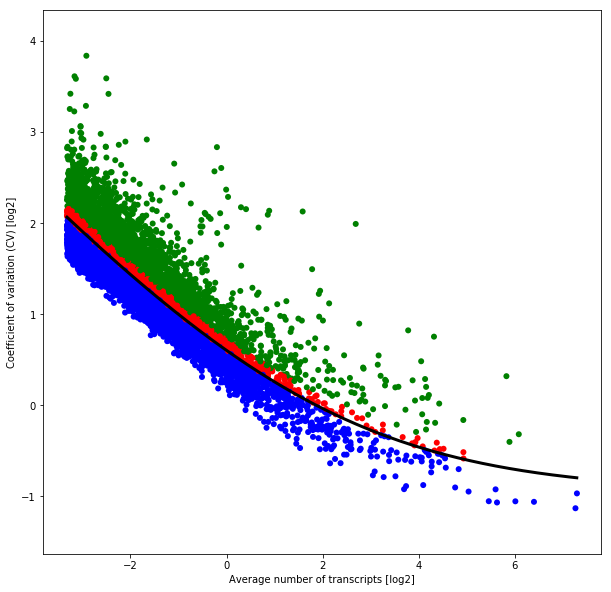

In [52]:
genes_sel_logit = select_features_v3(seq_Lgr5_IFE_OB_norm[cl_Lgr5_wnd_ctrl_sel_OB_IFE.index], 0.1, 2500, path_input, return_all=False, drop_spikes = False, drop_markers = False).index

In [57]:
genes_sel_logit = list(genes_sel_IFEB) + list(genes_sel_OB)

In [58]:
len(genes_sel_logit)

617

In [104]:
cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit = cl_Lgr5_wnd_ctrl_sel_OB_IFE.copy()

gr_sel = ['Lgr5 - %s' % gr for gr in return_unique(cl_Lgr5_wnd_ctrl_sel)] + ['IFEB']

cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit = cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit[cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit.isin(gr_sel)]

cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit[cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit=='Lgr5 - ctrl'] = 'OB'

In [105]:
Counter(cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit)

Counter({'IFEB': 25,
         'Lgr5 - 0': 11,
         'Lgr5 - 1': 22,
         'Lgr5 - 2': 32,
         'Lgr5 - 3': 19,
         'Lgr5 - 4': 22,
         'OB': 25})

In [106]:
logit_Lgr5_IFEB_vs_OB_proba = logit_2groups_get_proba_v2(log2Transform(seq_Lgr5_IFE_OB_norm), 
                                         cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit, 
                                         genes_sel_logit,
                                         cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit[cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit.isin(['IFEB','OB'])], 
                                         return_unique(cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit), 
                                         Cs = [10**C for C in np.arange(0,10.1,0.25)])


Calculating binary logarithm of x + 1


/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [107]:
for gr in return_unique(cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit):
    c_sel = cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit[cl_Lgr5_wnd_ctrl_sel_OB_IFE_logit==gr].index
    print (gr, Counter(logit_Lgr5_IFEB_vs_OB_proba.ix[c_sel, 'class']))

Lgr5 - 4 Counter({'IFEB': 12, 'OB': 10})
Lgr5 - 3 Counter({'OB': 19})
Lgr5 - 1 Counter({'OB': 18, 'IFEB': 4})
Lgr5 - 2 Counter({'OB': 28, 'IFEB': 4})
Lgr5 - 0 Counter({'IFEB': 9, 'OB': 2})
OB Counter({'OB': 25})
IFEB Counter({'IFEB': 25})


/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


### Checkpoint

In [108]:
saveData_v1(logit_Lgr5_IFEB_vs_OB_proba, path_output, exp_id, 'logit_Lgr5_IFEB_vs_OB_proba')

In [109]:
logit_Lgr5_IFEB_vs_OB_proba = loadData_v1(path_output, exp_id, 'logit_Lgr5_IFEB_vs_OB_proba', 'DataFrame')

### Plot data

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:50: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


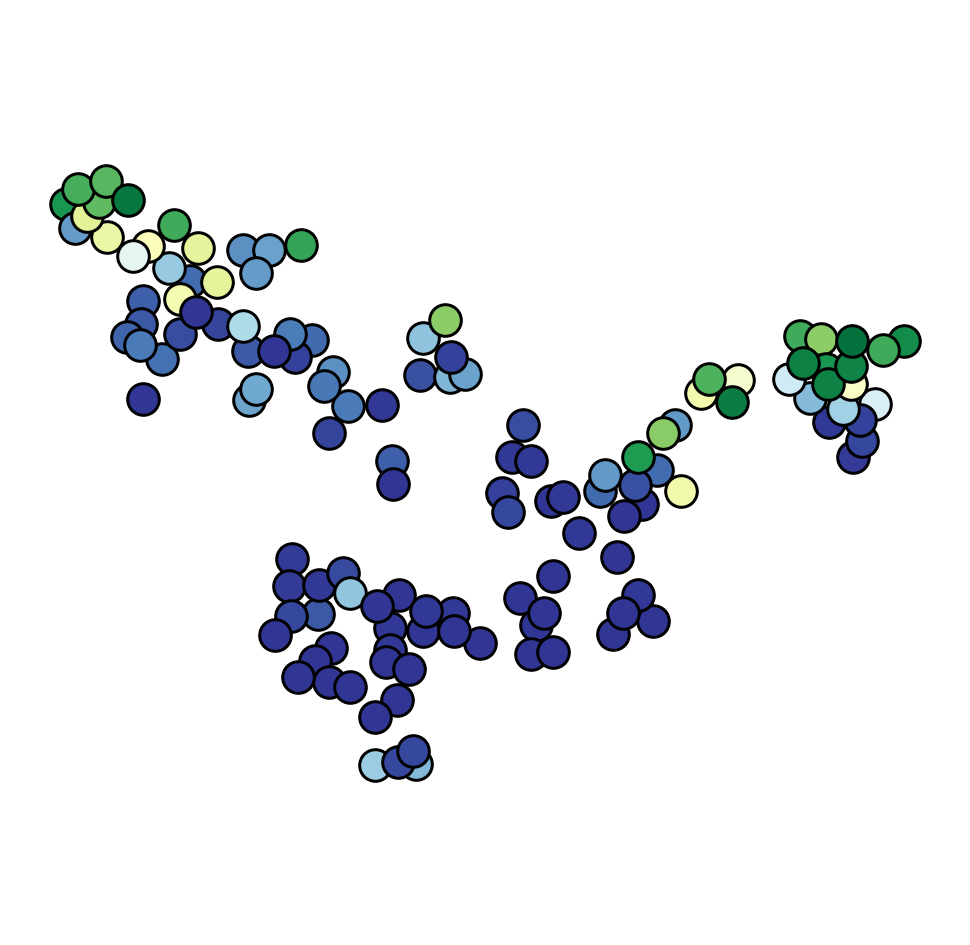

In [110]:
tsne = tsne_Lgr5_wnd_ctrl_sel
cells = cl_Lgr5_wnd_ctrl_sel
vmin = 0.0
vmax = 1.0
cells = logit_Lgr5_IFEB_vs_OB_proba['proba']
cmap1 = plt.cm.RdYlBu_r
cmap2 = plt.cm.RdYlGn

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

clist_tsne = []
for ix in tsne.index:
    if cells[ix] > 0.5: clist_tsne += [cmap2(cells[ix])]
    elif cells[ix] <= 0.5: clist_tsne += [cmap1(cells[ix])]

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for pos, ix in enumerate(tsne.index):

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = clist_tsne[pos],
                edgecolor='black', 
                marker = 'o')
    
clean_axis(ax1)
    
figname = 'v2.6_2_logit_OB_IFE.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


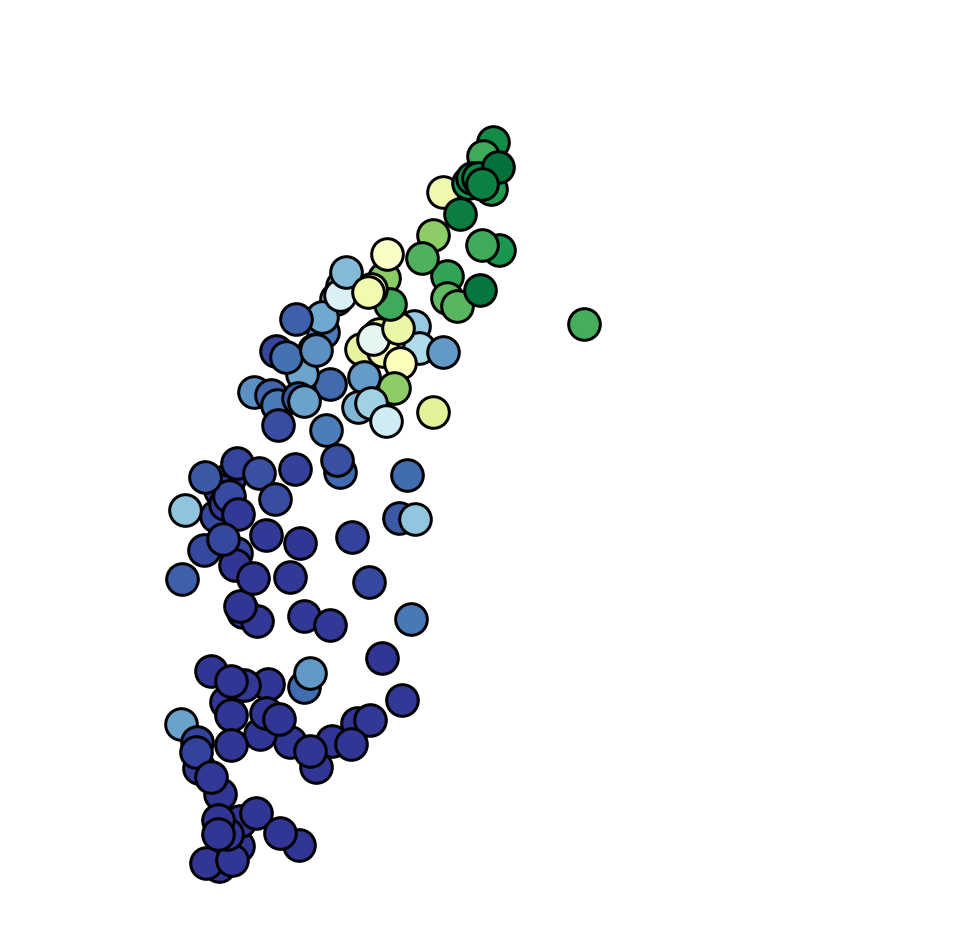

In [111]:
tsne = tsne_Lgr5_IFE_OB
cells = cl_Lgr5_wnd_ctrl_sel
vmin = 0.0
vmax = 1.0
cells = logit_Lgr5_IFEB_vs_OB_proba.ix[cl_Lgr5_wnd_ctrl_sel.index,'proba']
cmap1 = plt.cm.RdYlBu_r
cmap2 = plt.cm.RdYlGn

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

clist_tsne = []
for ix in cells.index:
    if cells[ix] > 0.5: clist_tsne += [cmap2(cells[ix])]
    elif cells[ix] <= 0.5: clist_tsne += [cmap1(cells[ix])]

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for pos, ix in enumerate(cells.index):

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = clist_tsne[pos],
                edgecolor='black', 
                marker = 'o')
    
clean_axis(ax1)
    
figname = 'v2.6_2_logit_OB_IFE_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

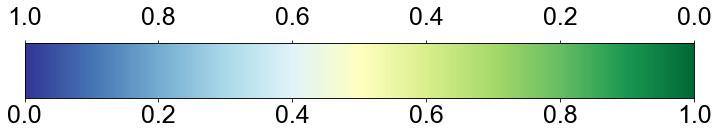

In [112]:
cmap1 = plt.cm.RdYlBu_r
     
height = 1
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

for pos in np.arange(0.0, 1.0, 0.001):
    if pos > 0.5: axLabel.axvspan(pos, pos + 0.001, color = cmap2(pos))
    elif pos <= 0.5: axLabel.axvspan(pos, pos + 0.001, color = cmap1(pos))
    
remove_ticks(axLabel)

axLabel.set_xlim(0,1)
axLabel.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axLabel.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], family = 'Arial', fontsize = 25)
    
plt.rcParams['xtick.major.pad'] = 10

#axLabel.set_xlabel('Prob (IFE basal)', family = 'Arial', fontsize = 30)

axLabel = axLabel.twiny()
axLabel.set_xlim(0,1)
axLabel.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axLabel.set_xticklabels([1.0, 0.8, 0.6, 0.4, 0.2, 0.0], family = 'Arial', fontsize = 25)
    
plt.rcParams['xtick.major.pad'] = 12

#axLabel.set_xlabel('Prob (Outer bulge)', family = 'Arial', fontsize = 30)

figname = 'v2.5_2_logit_OB_IFEB_Legend.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# PCA representation of data

In [67]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
seq_wnd_IFE_OB_norm = loadData_v1(path_output, exp_id, 'seq_wnd_IFE_OB_norm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [35]:
cl_wnd_OB_IFE = loadData_v1(path_output, exp_id, 'cl_wnd_OB_IFE', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


### Feature selection

In [69]:
NBR_1st_traces = loadData_from_pickle_v1(path_input, '201509151726', 'NBR_1st_traces')

In [70]:
NBR_1st_telogen_IFEB_vs_OB = neg_binom_estimate_prob_all_groups_v1P(NBR_1st_traces[['7','2']], dview)

In [71]:
genes_sel_OB = NBR_1st_telogen_IFEB_vs_OB['7'][NBR_1st_telogen_IFEB_vs_OB['7']==0].index
genes_sel_IFEB = NBR_1st_telogen_IFEB_vs_OB['2'][NBR_1st_telogen_IFEB_vs_OB['2']==0].index

In [77]:
len(genes_sel_OB), len(genes_sel_IFEB)

(312, 310)

In [78]:
genes_sel_IFE_OB = list(genes_sel_OB) + list(genes_sel_IFEB)

In [100]:
seq_wnd_IFE_OB_norm_pca = dist_mat_dim_reduc_v2(log2Transform(seq_wnd_IFE_OB_norm.ix[genes_sel_IFE_OB, cl_wnd_OB_IFE.index]), dim=3, method='PCA', distance = 'euclidean')[0]


Calculating binary logarithm of x + 1


In [101]:
pca_Lgr5_wnd_IFE_OB = seq_wnd_IFE_OB_norm_pca.T
pca_Lgr5_wnd_IFE_OB.columns = ['x','y','z']

In [108]:
def pca_explained_var(data, dim = 50, **kwargs):
    
    pca = PCA(n_components=dim, **kwargs)
    pca_fit = pca.fit(data.T)
    exp_var = pca_fit.explained_variance_
    
    plt.figure(figsize = [15,10], facecolor = 'w')
    ax = plt.axes()
    
    ax.set_xlabel('Principal components')
    ax.set_ylabel('Explained Variance')
    
    ax.set_xlim(-0.5, dim-0.5)
    ax.set_ylim(0, np.max(exp_var) * 1.1)
    
    ax.scatter(range(dim), exp_var, c = 'dodgerblue', linewidth = 0, s = 100)


Calculating binary logarithm of x + 1


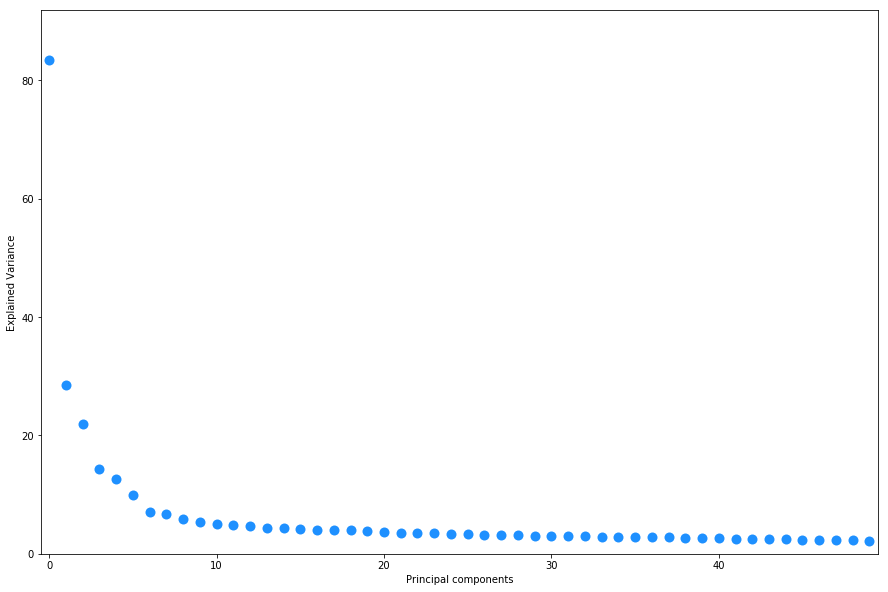

In [109]:
pca_explained_var(log2Transform(seq_wnd_IFE_OB_norm.ix[genes_sel_IFE_OB, cl_wnd_OB_IFE.index]))


Calculating binary logarithm of x + 1


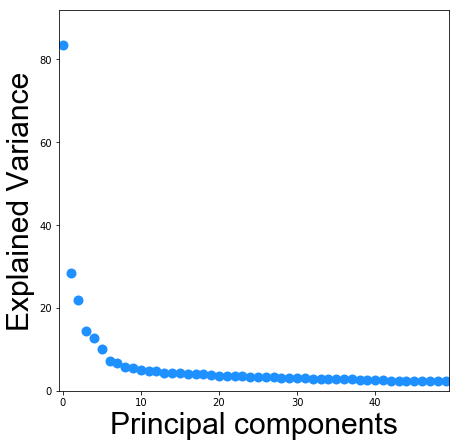

In [255]:
data = log2Transform(seq_wnd_IFE_OB_norm.ix[genes_sel_IFE_OB, cl_wnd_OB_IFE.index])
dim = 50

pca = PCA(n_components=dim)
pca_fit = pca.fit(data.T)
exp_var = pca_fit.explained_variance_

#initialize figure

height = 7
width = 7

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)
    
ax.set_xlabel('Principal components', family = 'Arial', fontsize = 30)
ax.set_ylabel('Explained Variance', family = 'Arial', fontsize = 30)
    
ax.set_xlim(-0.5, dim-0.5)
ax.set_ylim(0, np.max(exp_var) * 1.1)
    
ax.scatter(range(dim), exp_var, c = 'dodgerblue', linewidth = 0, s = 100)

figname = 'v2.6_S4_PCA_var.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Lgr5 vs. Lgr6

In [136]:
ix_sel = cl_Lgr5_wnd_ctrl_sel_OB_IFE[~cl_Lgr5_wnd_ctrl_sel_OB_IFE.isin(['IFEB','OB'])].index
gr_sel = [c.split(' - ')[0] for c in  cl_Lgr5_wnd_ctrl_sel_OB_IFE[ix_sel]]

cl_wnd_Lgr5_Lgr6 = pd.Series(gr_sel, index = ix_sel)

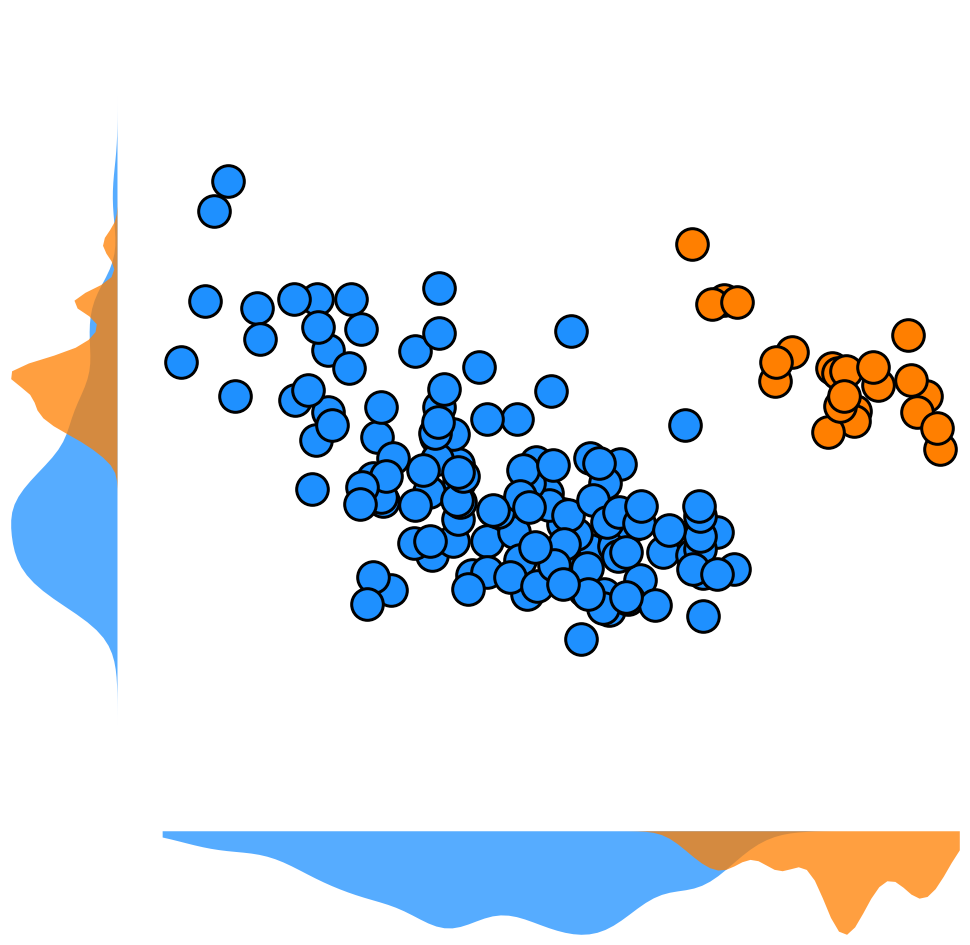

In [256]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = cl_wnd_Lgr5_Lgr6
cmap = {'Lgr5':'dodgerblue', 'Lgr6':'#ff7f00'}

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in set(cells):
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'x'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in set(cells):
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'y'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

figname = 'v2.6_S4_PCA_Lgr5_Lgr6.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

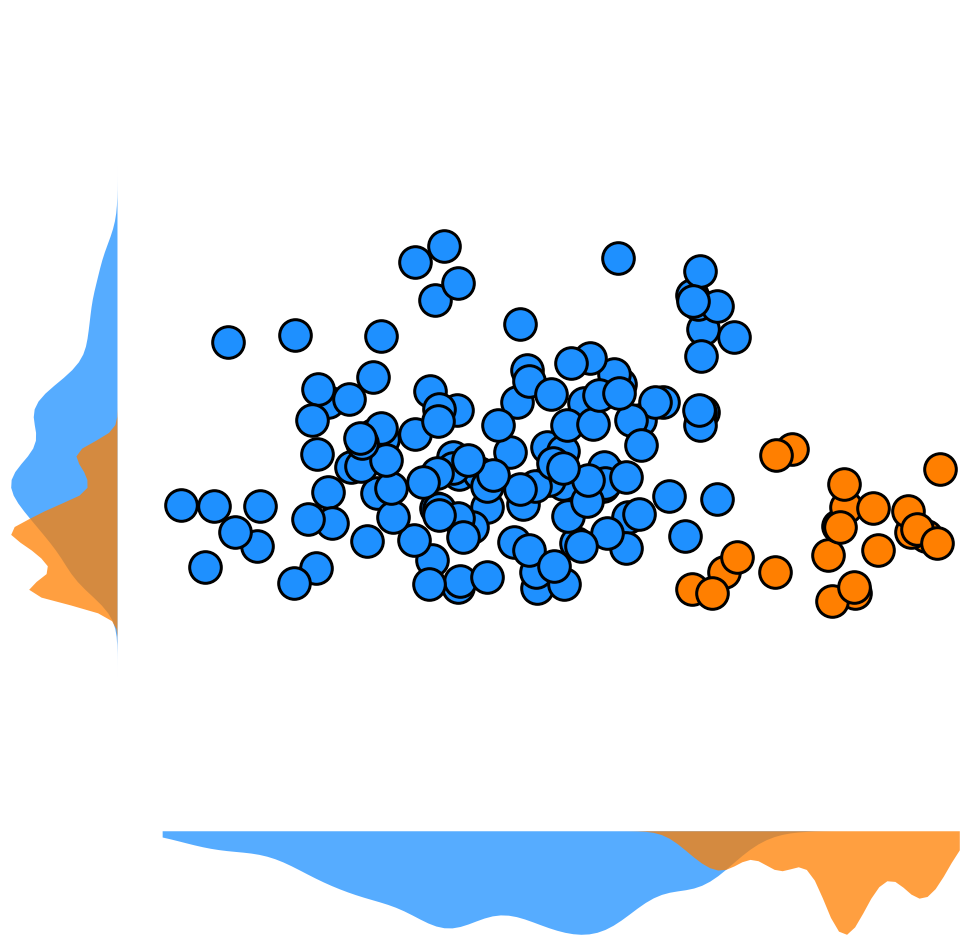

In [174]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = cl_wnd_Lgr5_Lgr6
cmap = {'Lgr5':'dodgerblue', 'Lgr6':'#ff7f00'}

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['z']), np.max(tsne['z'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'z'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in set(cells):
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'x'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in set(cells):
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'z'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

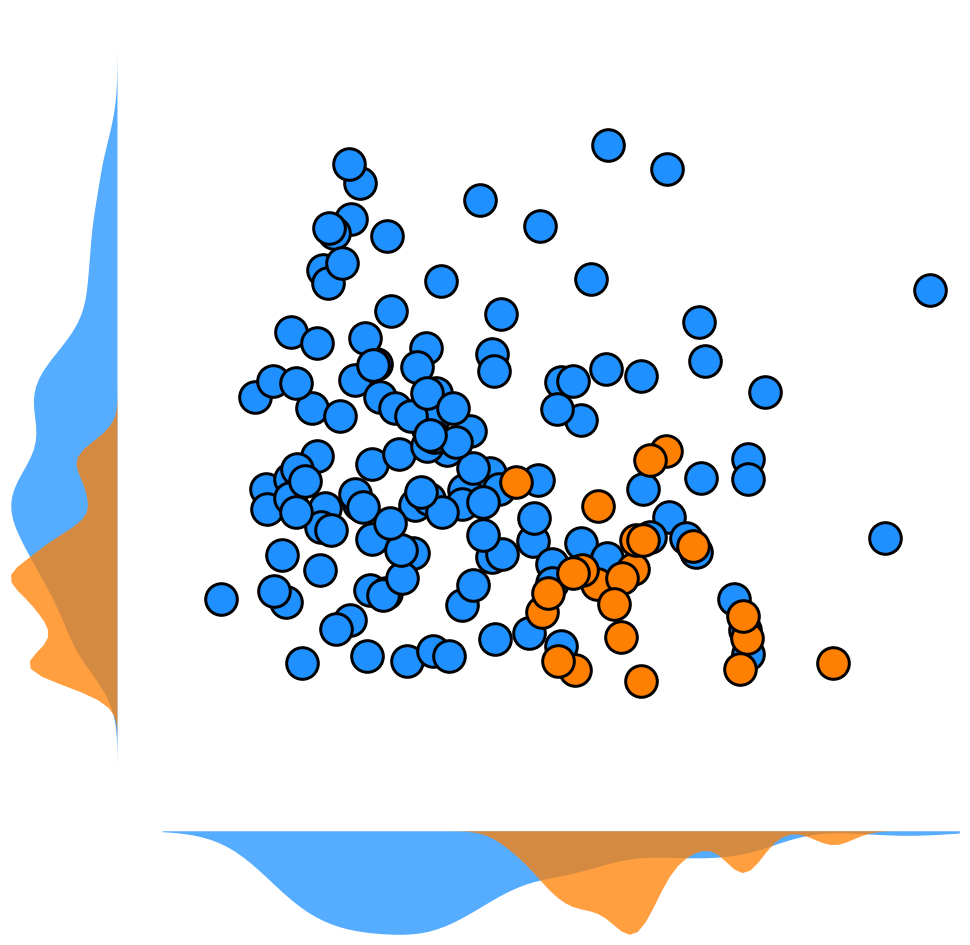

In [173]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = cl_wnd_Lgr5_Lgr6
cmap = {'Lgr5':'dodgerblue', 'Lgr6':'#ff7f00'}

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['y']), np.max(tsne['y'])
y_min, y_max = np.min(tsne['z']), np.max(tsne['z'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'y'],
                tsne.ix[ix,'z'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in set(cells):
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'y'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in set(cells):
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'z'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

## Cell groups

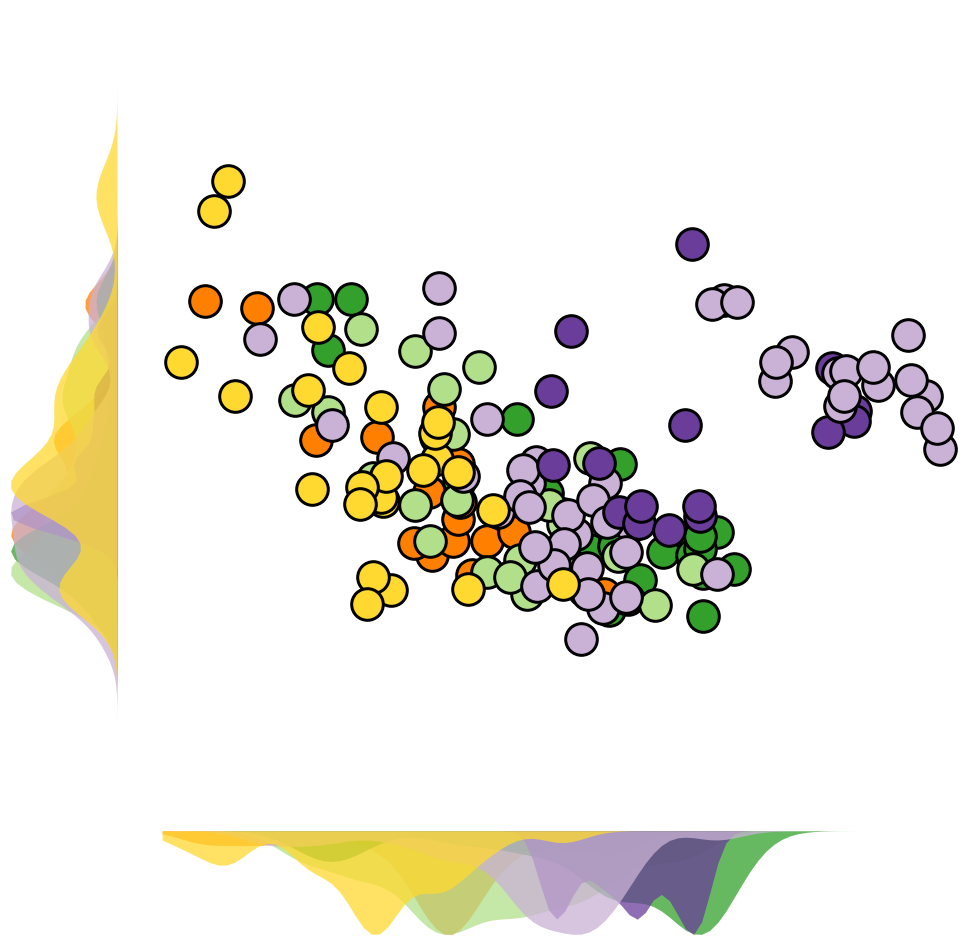

In [257]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = cl_Lgr5_wnd_ctrl_sel_OB_IFE
cells = cells[~cells.isin(['IFEB','OB'])]
cmap = pd.concat([cmap_Lgr5_state, cmap_Lgr6_state])

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] == 'Lgr5']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'x'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] == 'Lgr5']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'y'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

figname = 'v2.6_S4_PCA_states.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

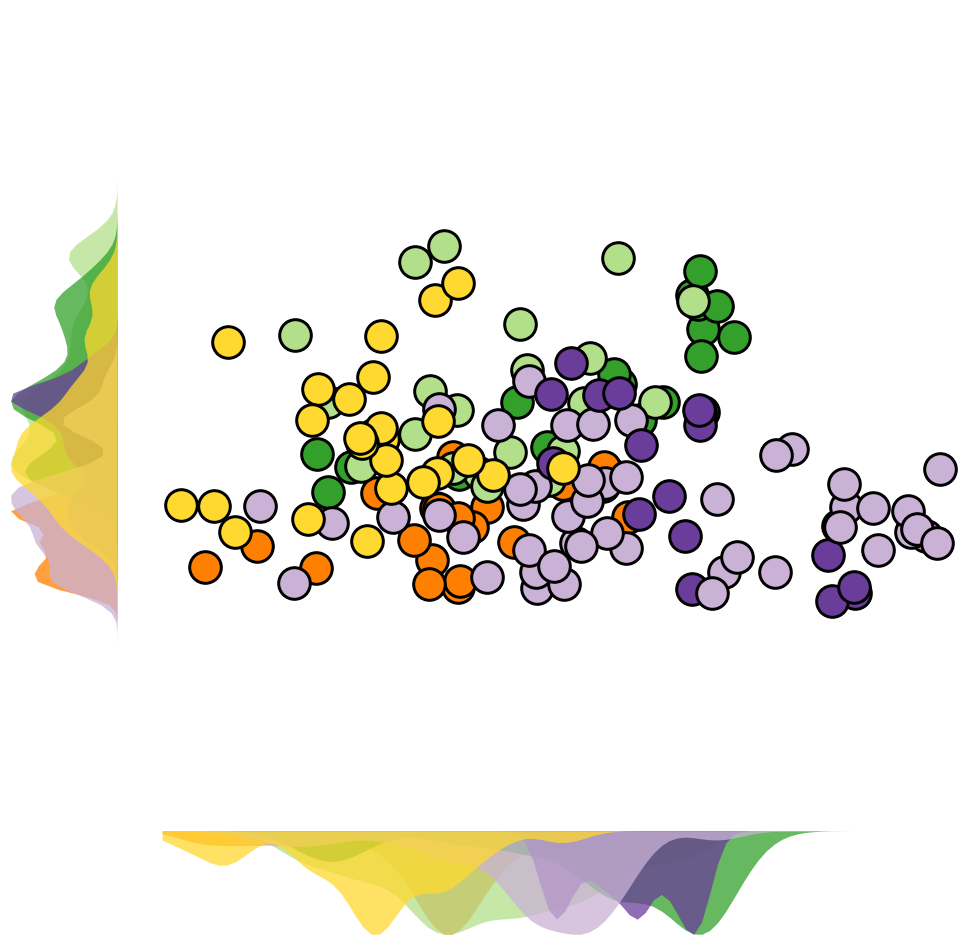

In [176]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = cl_Lgr5_wnd_ctrl_sel_OB_IFE
cells = cells[~cells.isin(['IFEB','OB'])]
cmap = pd.concat([cmap_Lgr5_state, cmap_Lgr6_state])

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['z']), np.max(tsne['z'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'z'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] == 'Lgr5']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'x'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] == 'Lgr5']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'z'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

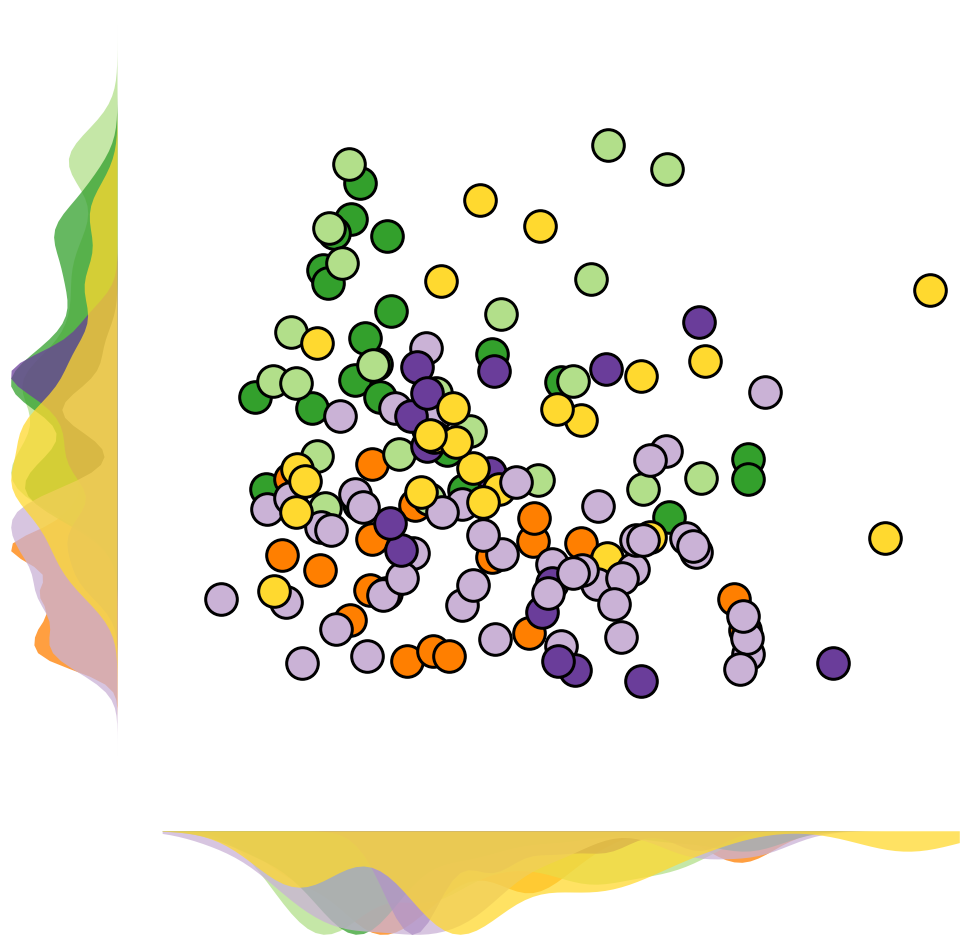

In [177]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = cl_Lgr5_wnd_ctrl_sel_OB_IFE
cells = cells[~cells.isin(['IFEB','OB'])]
cmap = pd.concat([cmap_Lgr5_state, cmap_Lgr6_state])

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['y']), np.max(tsne['y'])
y_min, y_max = np.min(tsne['z']), np.max(tsne['z'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'y'],
                tsne.ix[ix,'z'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] == 'Lgr5']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'y'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] == 'Lgr5']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'z'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

## Bins

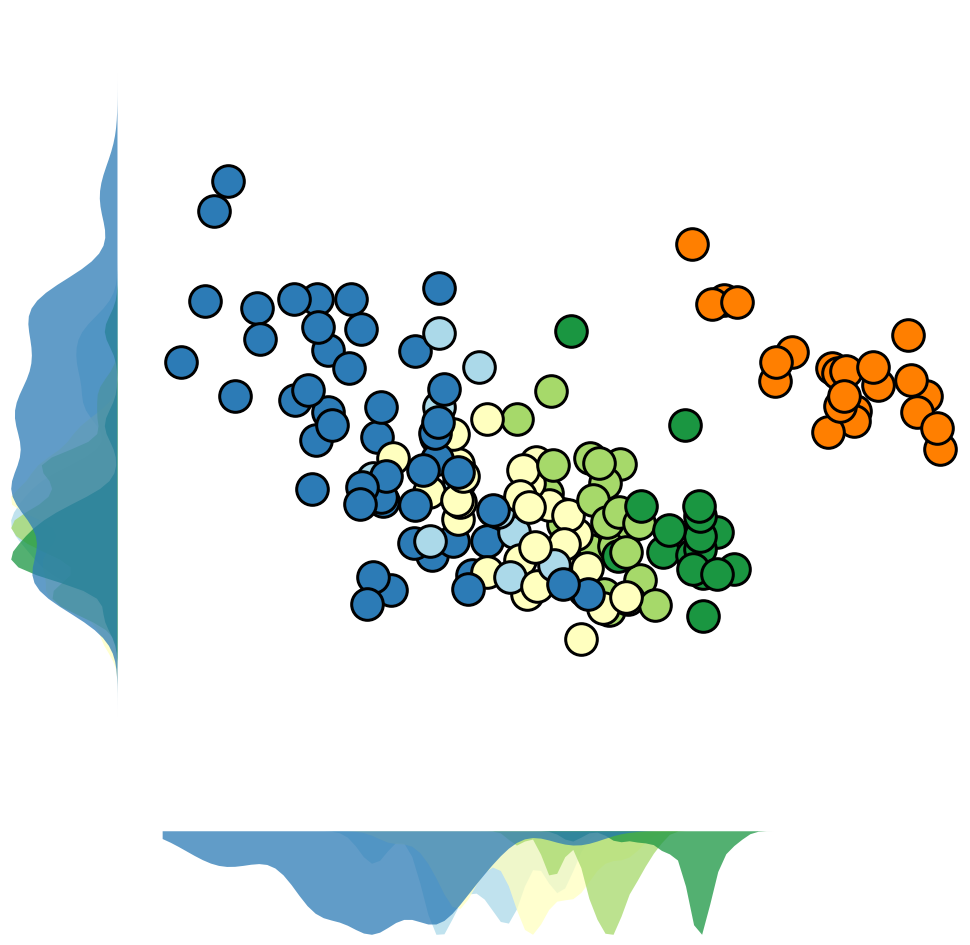

In [258]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = pd.concat([PT_bins, cl_Lgr5_wnd_ctrl_sel_OB_IFE[cl_Lgr5_wnd_ctrl_sel_OB_IFE.isin(['Lgr6 - 1','Lgr6 - 5'])]])
cells = cells[~cells.isin(['IFEB','OB'])]
cmap = cmap_bins

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] != 'Lgr6']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'x'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] != 'Lgr6']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'y'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

figname = 'v2.6_S4_PCA_bins.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

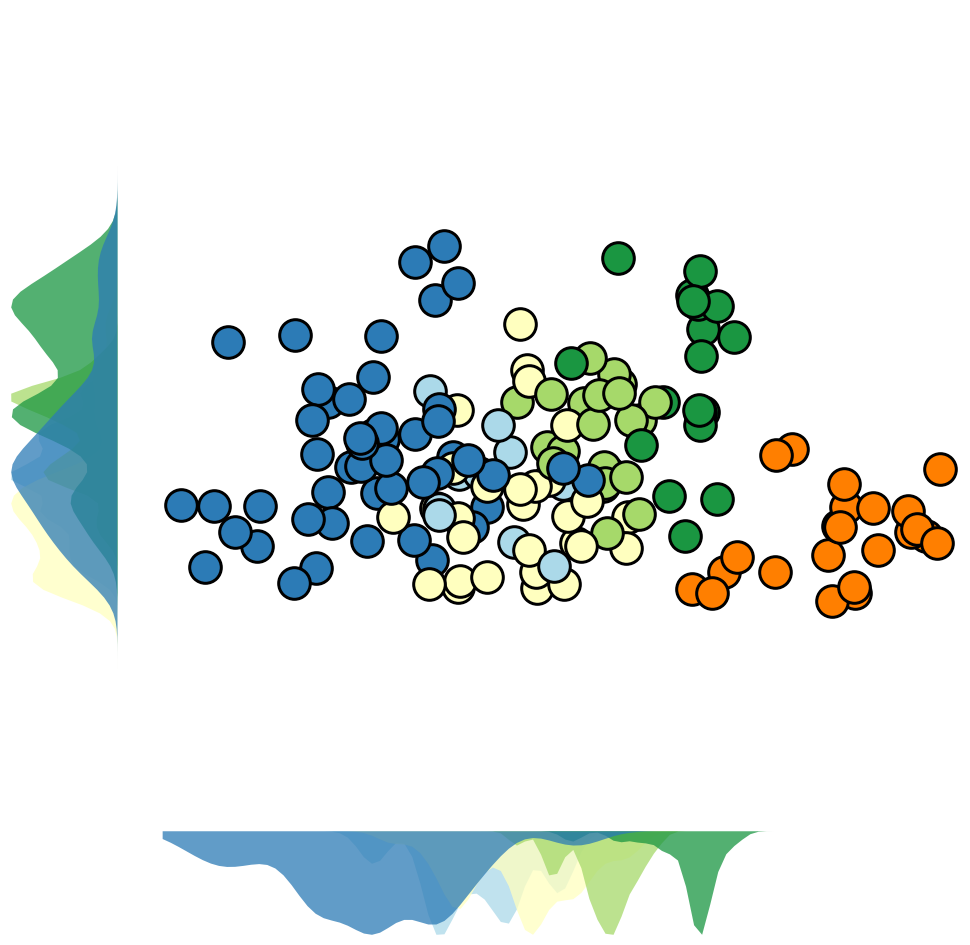

In [196]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = pd.concat([PT_bins, cl_Lgr5_wnd_ctrl_sel_OB_IFE[cl_Lgr5_wnd_ctrl_sel_OB_IFE.isin(['Lgr6 - 1','Lgr6 - 5'])]])
cells = cells[~cells.isin(['IFEB','OB'])]
cmap = cmap_bins

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['z']), np.max(tsne['z'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'z'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] != 'Lgr6']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'x'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] != 'Lgr6']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'z'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

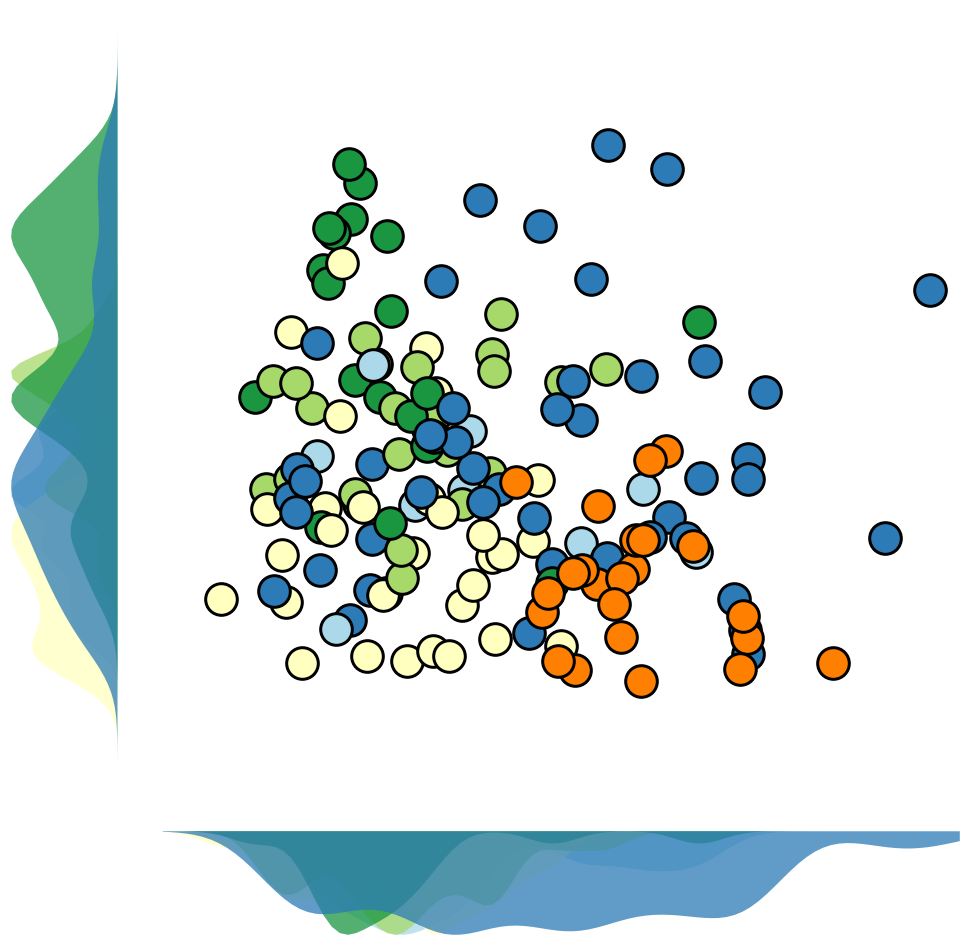

In [197]:
tsne = pca_Lgr5_wnd_IFE_OB
cells = pd.concat([PT_bins, cl_Lgr5_wnd_ctrl_sel_OB_IFE[cl_Lgr5_wnd_ctrl_sel_OB_IFE.isin(['Lgr6 - 1','Lgr6 - 5'])]])
cells = cells[~cells.isin(['IFEB','OB'])]
cmap = cmap_bins

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 2, hspace=0.1, wspace = 0.1, height_ratios = [15,2], width_ratios = [2,15])

# plot pca

ax1 = plt.subplot(gs[0,1])

#define x- and y-limits

x_min, x_max = np.min(tsne['y']), np.max(tsne['y'])
y_min, y_max = np.min(tsne['z']), np.max(tsne['z'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 1.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#draw groups

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

for ix in cells.index:

    ax1.scatter(tsne.ix[ix,'y'],
                tsne.ix[ix,'z'], 
                s = 1000,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

# kde - xaxis

ax2 = plt.subplot(gs[1,1])
ax2.set_xlim(xlim)
ax2.set_ylim(1,0)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] != 'Lgr6']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'y'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax2.fill_between(kde_x, kde_y, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax2)
    
# kde - yaxis

ax3 = plt.subplot(gs[0,0])
ax3.set_xlim(1,0)
ax3.set_ylim(ylim)

for gr in [gr for gr in set(cells) if gr.split(' - ')[0] != 'Lgr6']:
    c_tmp = cells[cells==gr].index
    kde_tmp = scipy.stats.gaussian_kde(tsne.loc[c_tmp,'z'])
    kde_x = np.linspace(xlim[0], xlim[1], 100)
    kde_tmp.set_bandwidth(0.25)
    kde_y = kde_tmp.evaluate(kde_x)
    kde_y = kde_y / np.max(kde_y)

    ax3.fill_between(kde_y, kde_x, linewidth = 0, color = cmap[gr], alpha = 0.75)
    
clean_axis(ax3)

# PC1 vs pseudotime

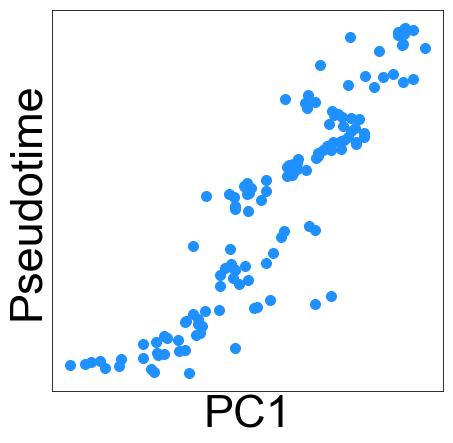

In [261]:
ixs = PTO_coords_Lgr5_OB_IFE.index

#initialize figure

height = 7
width = 7

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

ax.scatter(pca_Lgr5_wnd_IFE_OB.loc[ixs,'x'], PTO_coords_Lgr5_OB_IFE[ixs], color = 'dodgerblue', s = 100)

ax.set_xticks([])
ax.set_xlabel('PC1', family = 'Arial', fontsize = 45)

ax.set_yticks([])
ax.set_ylabel('Pseudotime', family = 'Arial', fontsize = 45)

figname = 'v2.6_S4_PC1_vs_Pseudotime.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [262]:
scipy.stats.spearmanr(pca_Lgr5_wnd_IFE_OB.loc[ixs,'x'], PTO_coords_Lgr5_OB_IFE[ixs])

SpearmanrResult(correlation=0.9303795441200022, pvalue=4.5405912555959965e-58)